In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

%matplotlib inline

# БПМИ203 old edition...
np.random.seed(203)

%config InlineBackend.figure_format = 'retina'

# sns.set(style='whitegrid', palette='deep')
# sns.set(style='darkgrid', palette='rocket')
sns.set(style='darkgrid', palette='deep')

plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.format'] = 'pdf'


In [2]:
def parse_type(name):
    return "/".join(name.split('/')[1:-1])

def parse_size(name):
    return int(name.split('/')[-1].split('.')[0])

def prepare_df(df):
    kMaxSize = None
    df["test_type"] = df["name"].apply(parse_type)
    df["rows"] = df["name"].apply(parse_size)
    if kMaxSize is not None:
        df = df[df["rows"] < kMaxSize]
    return df


In [3]:
df_info = pd.read_csv("tests_results/tests_info.csv")
df_info = prepare_df(df_info)
df_info


name    rows  columns  \
0                    tests_data/int/random_small/1.csv       1        1   
1                    tests_data/int/random_small/2.csv       2        1   
2                    tests_data/int/random_small/3.csv       3        1   
3                    tests_data/int/random_small/4.csv       4        1   
4                    tests_data/int/random_small/5.csv       5        1   
..                                                 ...     ...      ...   
494  tests_data/clickhouse/price_paid_transaction_d...   51010       16   
495  tests_data/clickhouse/price_paid_transaction_d...   61212       16   
496  tests_data/clickhouse/price_paid_transaction_d...   73455       16   
497  tests_data/clickhouse/price_paid_transaction_d...   88146       16   
498  tests_data/clickhouse/price_paid_transaction_d...  100000       16   

     serialized_size  compressed_size  compression_time_ns  \
0                  1                2                18761   
1                  2                3                  964   
2                  3                4                  673   
3                  4                5                  696   
4                  5                6                  678   
..               ...              ...                  ...   
494          8116666          4134736             18927832   
495          9739455          4966406             24975207   
496         11630726          5655915             40348763   
497         14022427          7143403             69824863   
498         15912171          8112115             40160963   

     decompression_time_ns                               test_type  
0                     2674                        int/random_small  
1                      379                        int/random_small  
2                      143                        int/random_small  
3                      146                        int/random_small  
4                      162                        int/random_small  
..                     ...                                     ...  
494                4466039  clickhouse/price_paid_transaction_data  
495                7720009  clickhouse/price_paid_transaction_data  
496                8955991  clickhouse/price_paid_transaction_data  
497               13932682  clickhouse/price_paid_transaction_data  
498                9373081  clickhouse/price_paid_transaction_data  

[499 rows x 8 columns]

In [4]:
df_algo = pd.read_csv("tests_results/algorithms_results.csv")
df_algo = prepare_df(df_algo)
df_algo


name       algorithm_name  \
0                     tests_data/int/random_small/1.csv             identity   
1                     tests_data/int/random_small/2.csv             identity   
2                     tests_data/int/random_small/3.csv             identity   
3                     tests_data/int/random_small/4.csv             identity   
4                     tests_data/int/random_small/5.csv             identity   
...                                                 ...                  ...   
3008  tests_data/clickhouse/price_paid_transaction_d...  suffix-array-greedy   
3009  tests_data/clickhouse/price_paid_transaction_d...  suffix-array-greedy   
3010  tests_data/clickhouse/price_paid_transaction_d...  suffix-array-greedy   
3011  tests_data/clickhouse/price_paid_transaction_d...  suffix-array-greedy   
3012  tests_data/clickhouse/price_paid_transaction_d...  suffix-array-greedy   

      find_permutation_time_ns  serialized_size  compressed_size  \
0                          362                1                2   
1                          181                2                3   
2                          102                3                4   
3                          199                4                5   
4                          166                5                6   
...                        ...              ...              ...   
3008               23287065258          8116666          3968154   
3009               50093507914          9739455          4766735   
3010               52937711226         11630726          5427171   
3011               69462901286         14022427          6854635   
3012              102553348024         15912171          7784024   

      compression_time_ns  decompression_time_ns  \
0                     424                    259   
1                     332                    121   
2                     254                     85   
3                     281                    127   
4                     338                    124   
...                   ...                    ...   
3008             17683038                4424490   
3009             20829151                5892457   
3010             24805076                6808046   
3011             30443860                8047574   
3012             38644701                9292227   

                                   test_type    rows  
0                           int/random_small       1  
1                           int/random_small       2  
2                           int/random_small       3  
3                           int/random_small       4  
4                           int/random_small       5  
...                                      ...     ...  
3008  clickhouse/price_paid_transaction_data   51010  
3009  clickhouse/price_paid_transaction_data   61212  
3010  clickhouse/price_paid_transaction_data   73455  
3011  clickhouse/price_paid_transaction_data   88146  
3012  clickhouse/price_paid_transaction_data  100000  

[3013 rows x 9 columns]

In [5]:
algorithm_names = df_algo["algorithm_name"].unique()
algorithm_names


array(['identity', 'shuffle-100000000', 'local-optimizations-100000000',
       'lexicographic sort', 'lexicographic sort offline column order',
       'lexicographic sort online column order', 'suffix-array-greedy'],
      dtype=object)

In [6]:
tests_types = df_algo["test_type"].unique()
tests_types


array(['int/random_small', 'int/many_random_small', 'int/random_big',
       'english/dictionary', 'clickhouse/hits', 'clickhouse/dish',
       'clickhouse/menu', 'clickhouse/menu_item', 'clickhouse/menu_page',
       'clickhouse/price_paid_transaction_data'], dtype=object)

In [7]:
def plot_for_test_type_compression_sorts(test_type):
    plt.ion()
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(25, 8))

    fig.suptitle(f'Анализ алгоритмов для тестов из выборки {test_type}', fontsize=18)

    for algorithm_name in algorithm_names:
        subset = df_algo[(df_algo["test_type"] == test_type) & (df_algo["algorithm_name"] == algorithm_name)]    
        ax1.plot(subset['rows'], subset['find_permutation_time_ns'] / 1000000000, label=algorithm_name)
        ax2.plot(subset['rows'], subset['compressed_size'], label=algorithm_name)
        ax3.plot(subset['rows'], subset['compression_time_ns'] / 1000000000, label=algorithm_name)
    
    subset = df_info[df_info["test_type"] == test_type]    
    ax2.plot(subset['rows'], subset['serialized_size'], label="without compression")

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper left')
    ax3.legend(loc='upper left')

    # ax1.set_xscale('log')
    # ax2.set_xscale('log')
    # ax3.set_xscale('log')

    # ax1.set_yscale('log')
    # ax2.set_yscale('log')
    # ax3.set_yscale('log')

    ax1.set_title('Зависимость времени выполнения от размера теста', fontsize = 15)
    ax2.set_title('Зависимость сжатого размера от размера теста', fontsize = 15)
    ax3.set_title('Зависимость времени сжатия от размера теста', fontsize = 15)

    ax1.set_xlabel('Размер теста (# строк)', fontsize = 15)
    ax1.set_ylabel('Время нахождения перестановки (s)', fontsize = 15)

    ax2.set_xlabel('Размер теста (#строк)', fontsize = 15)
    ax2.set_ylabel('Сжатый размер (bytes)', fontsize = 15)

    ax3.set_xlabel('Размер теста (#строк)', fontsize = 15)
    ax3.set_ylabel('Время на сжатие (s)', fontsize = 15)

    plt.show()


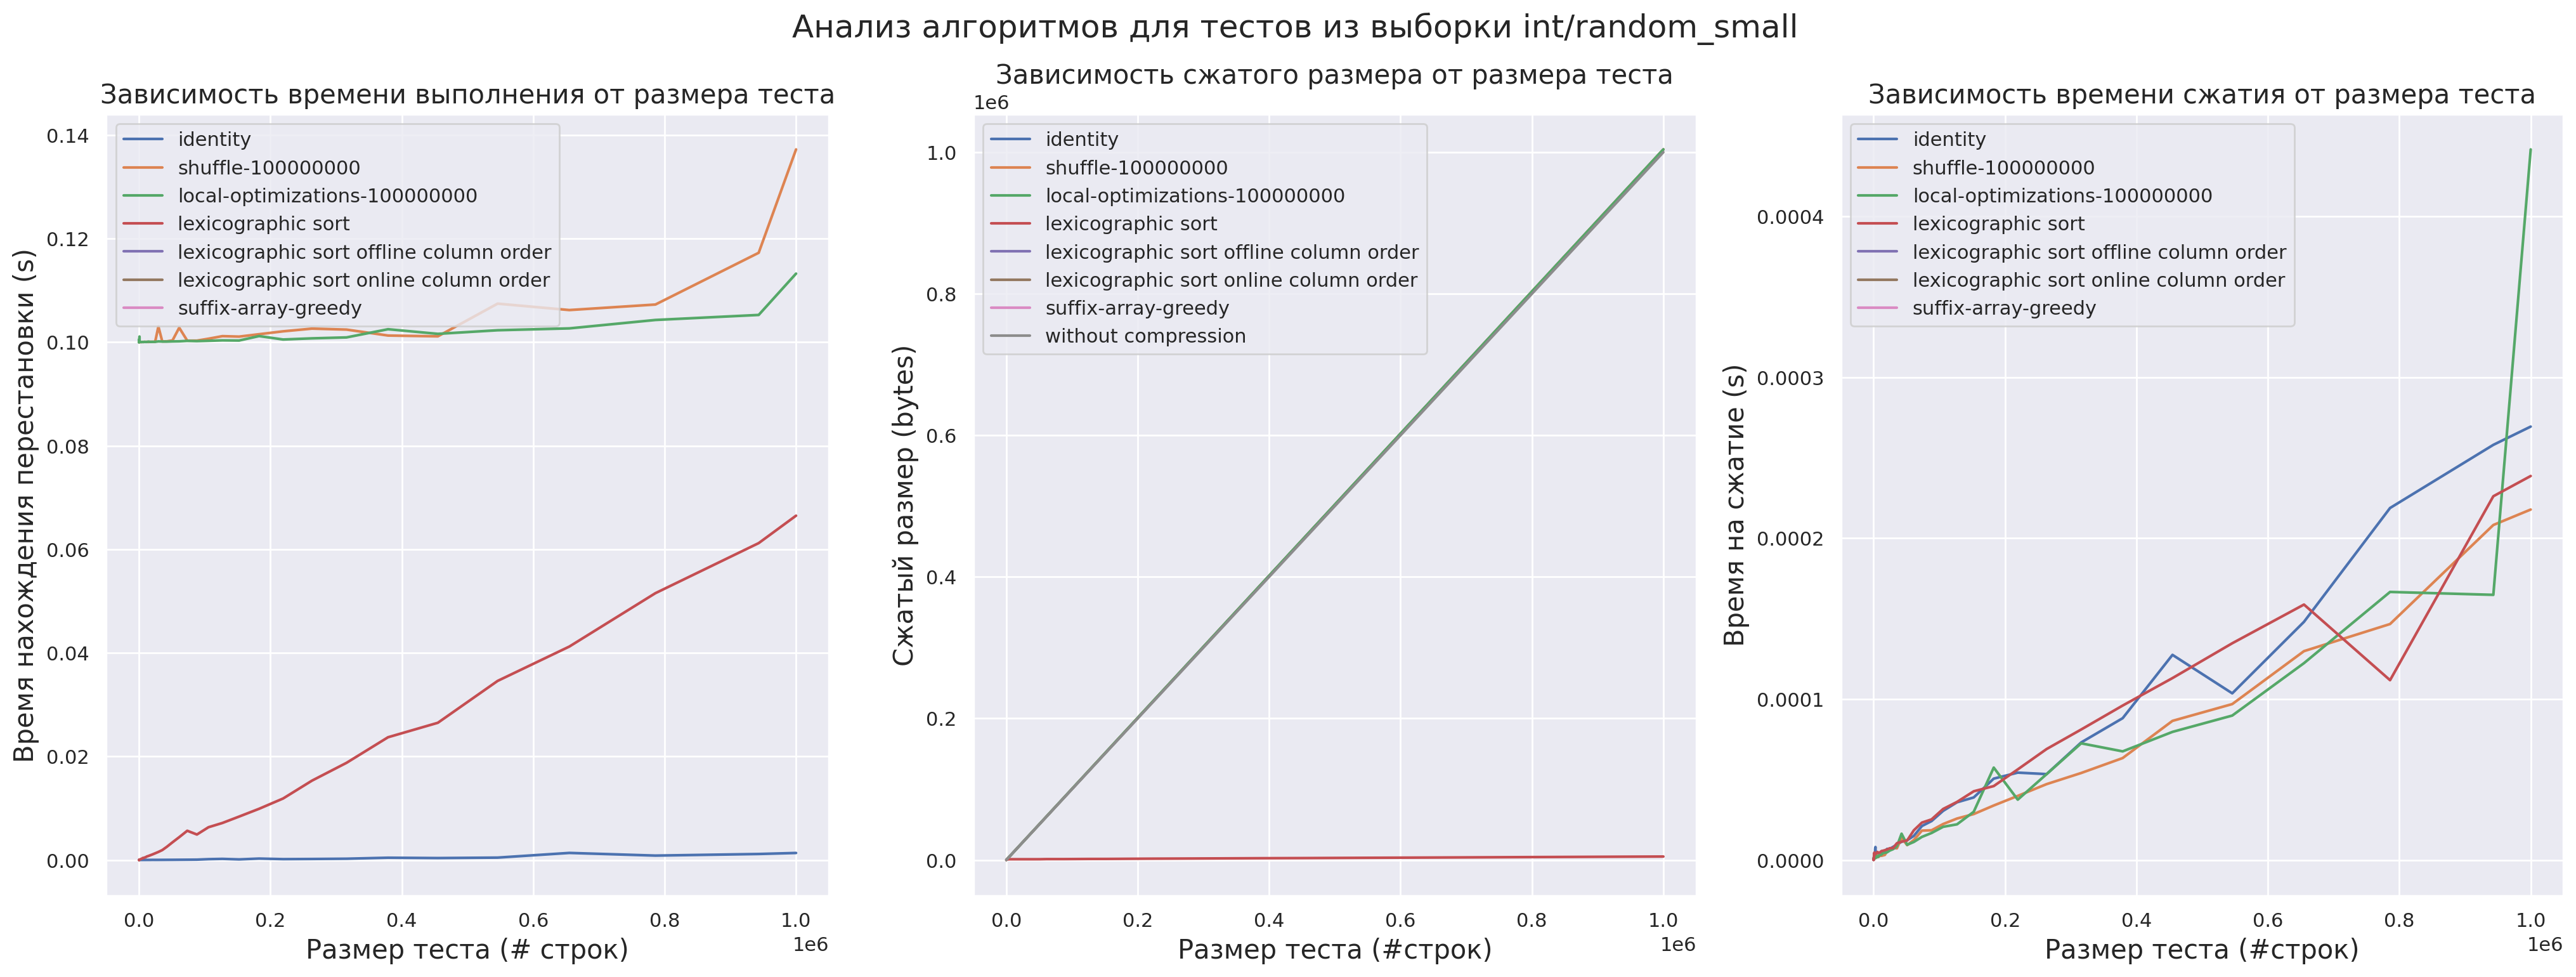

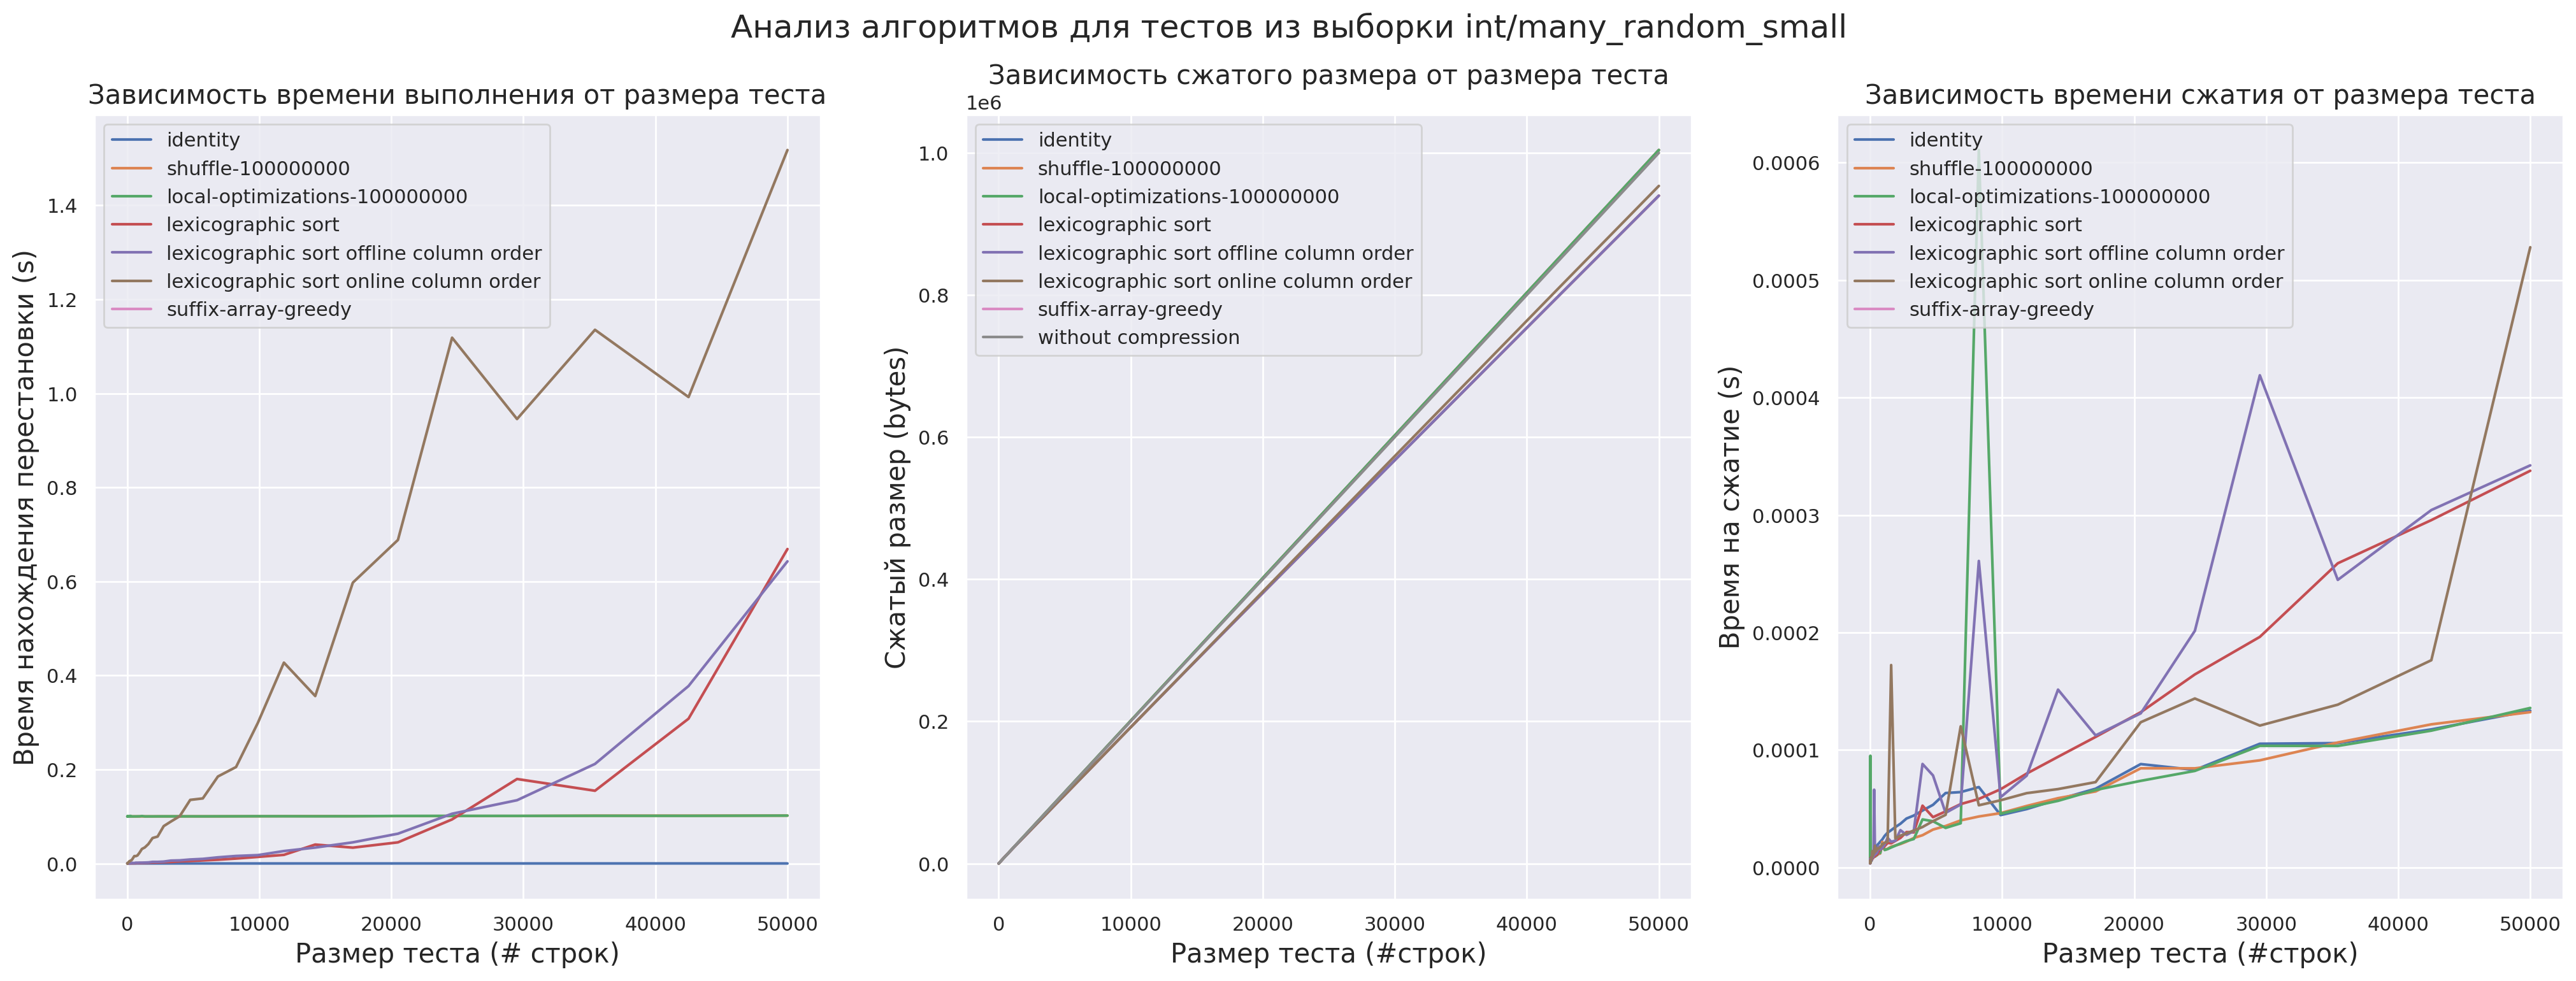

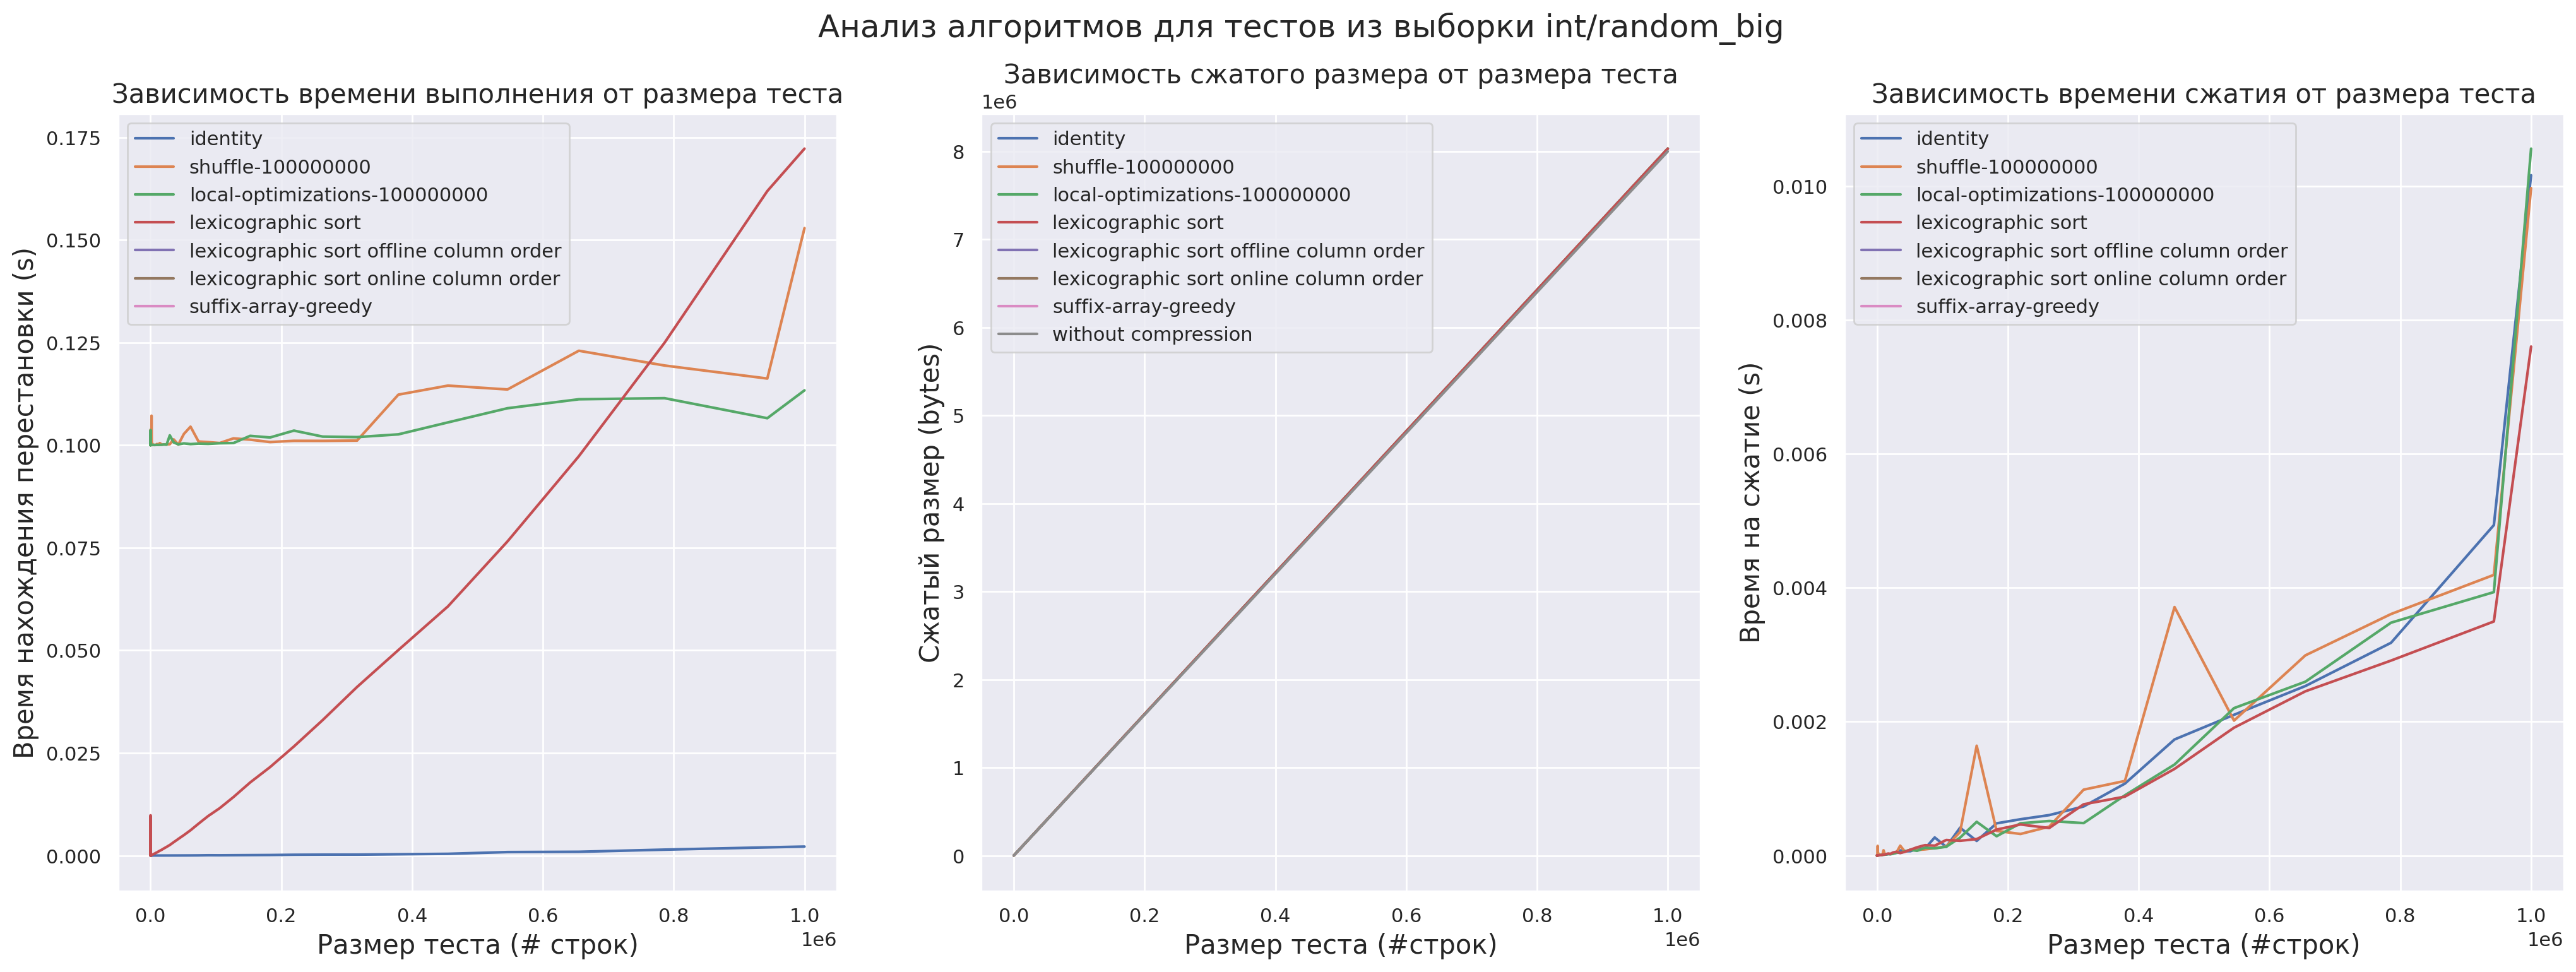

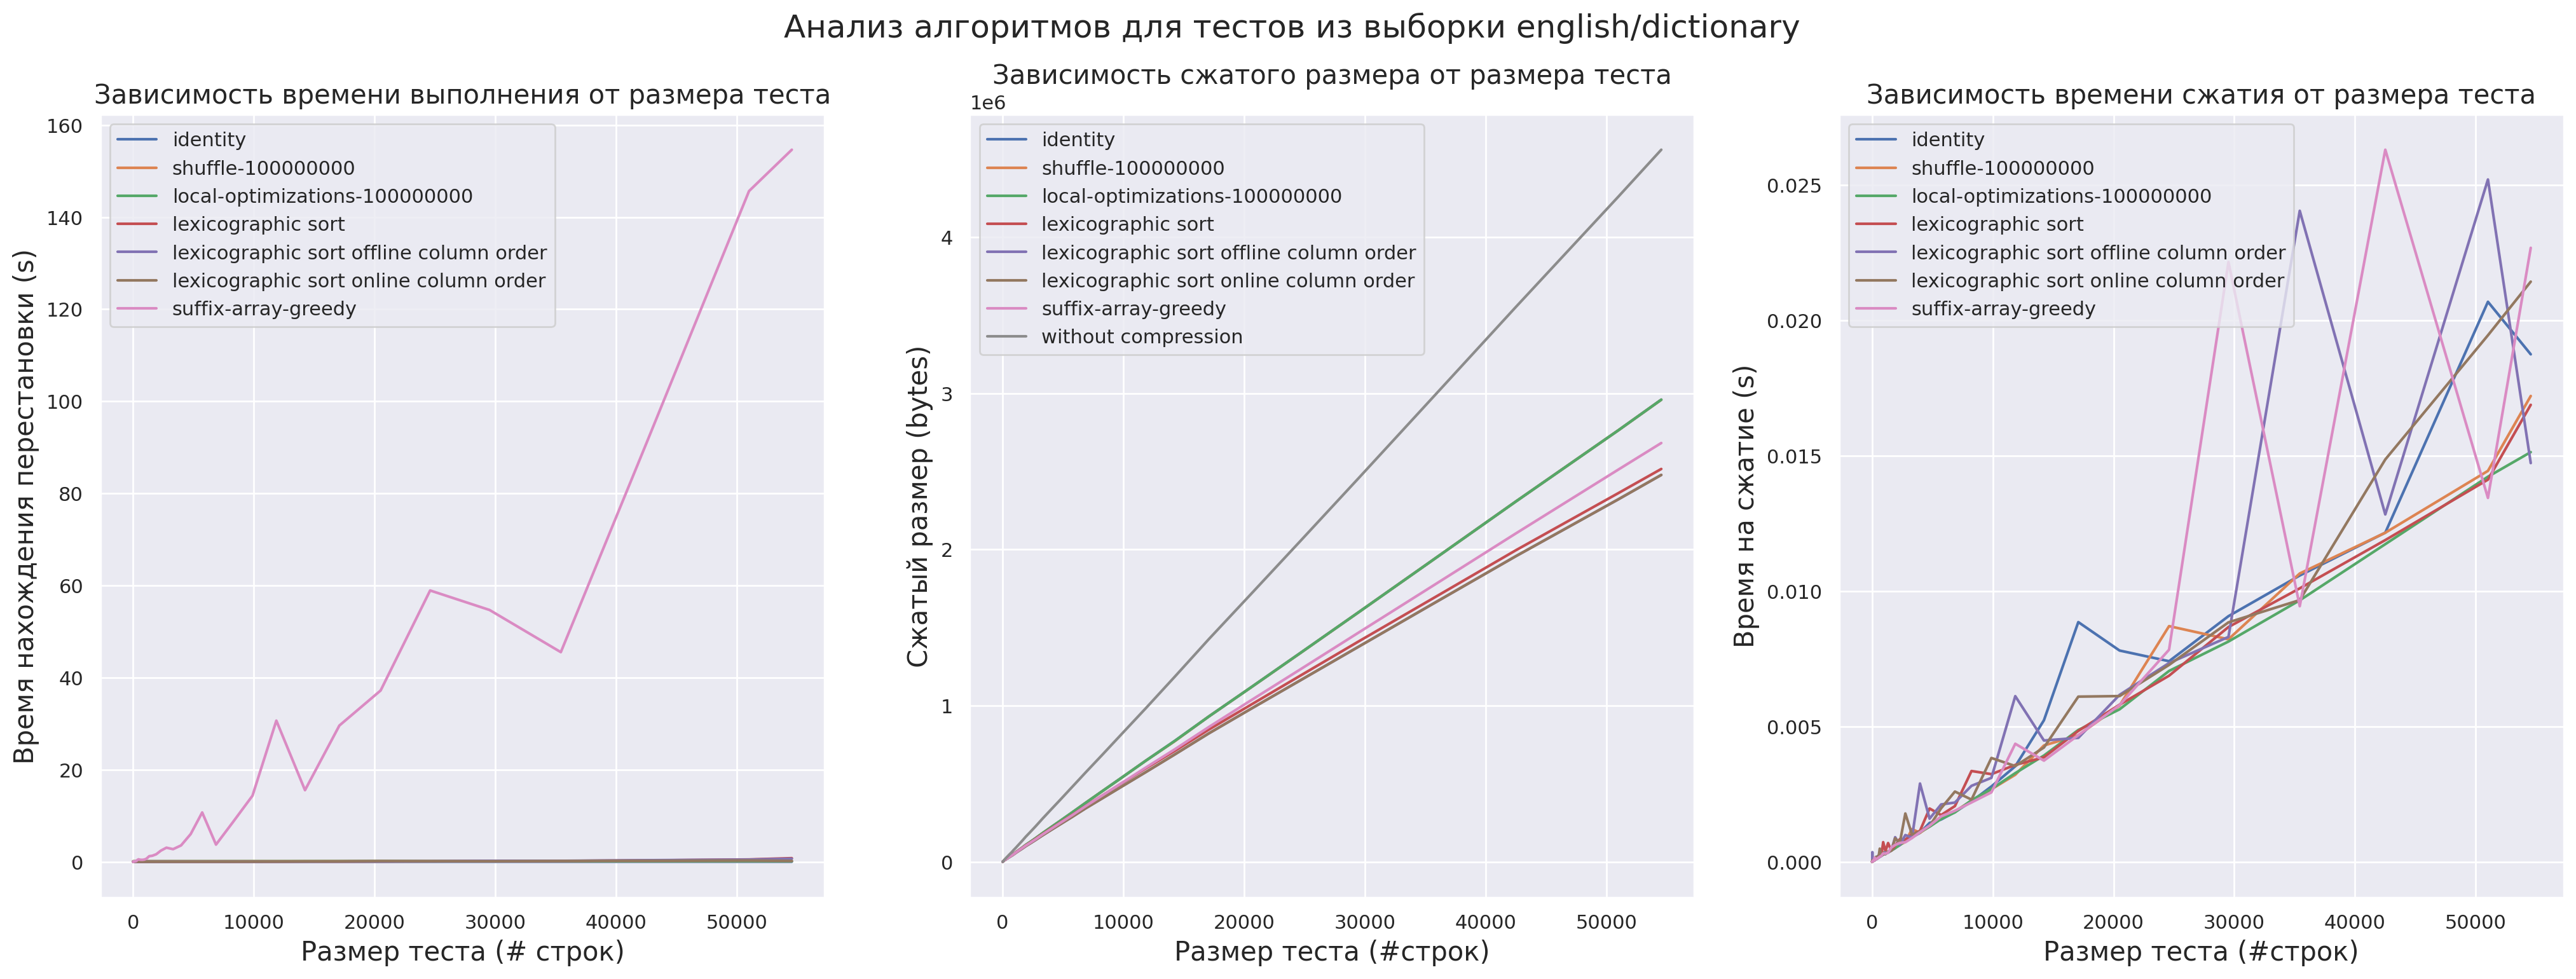

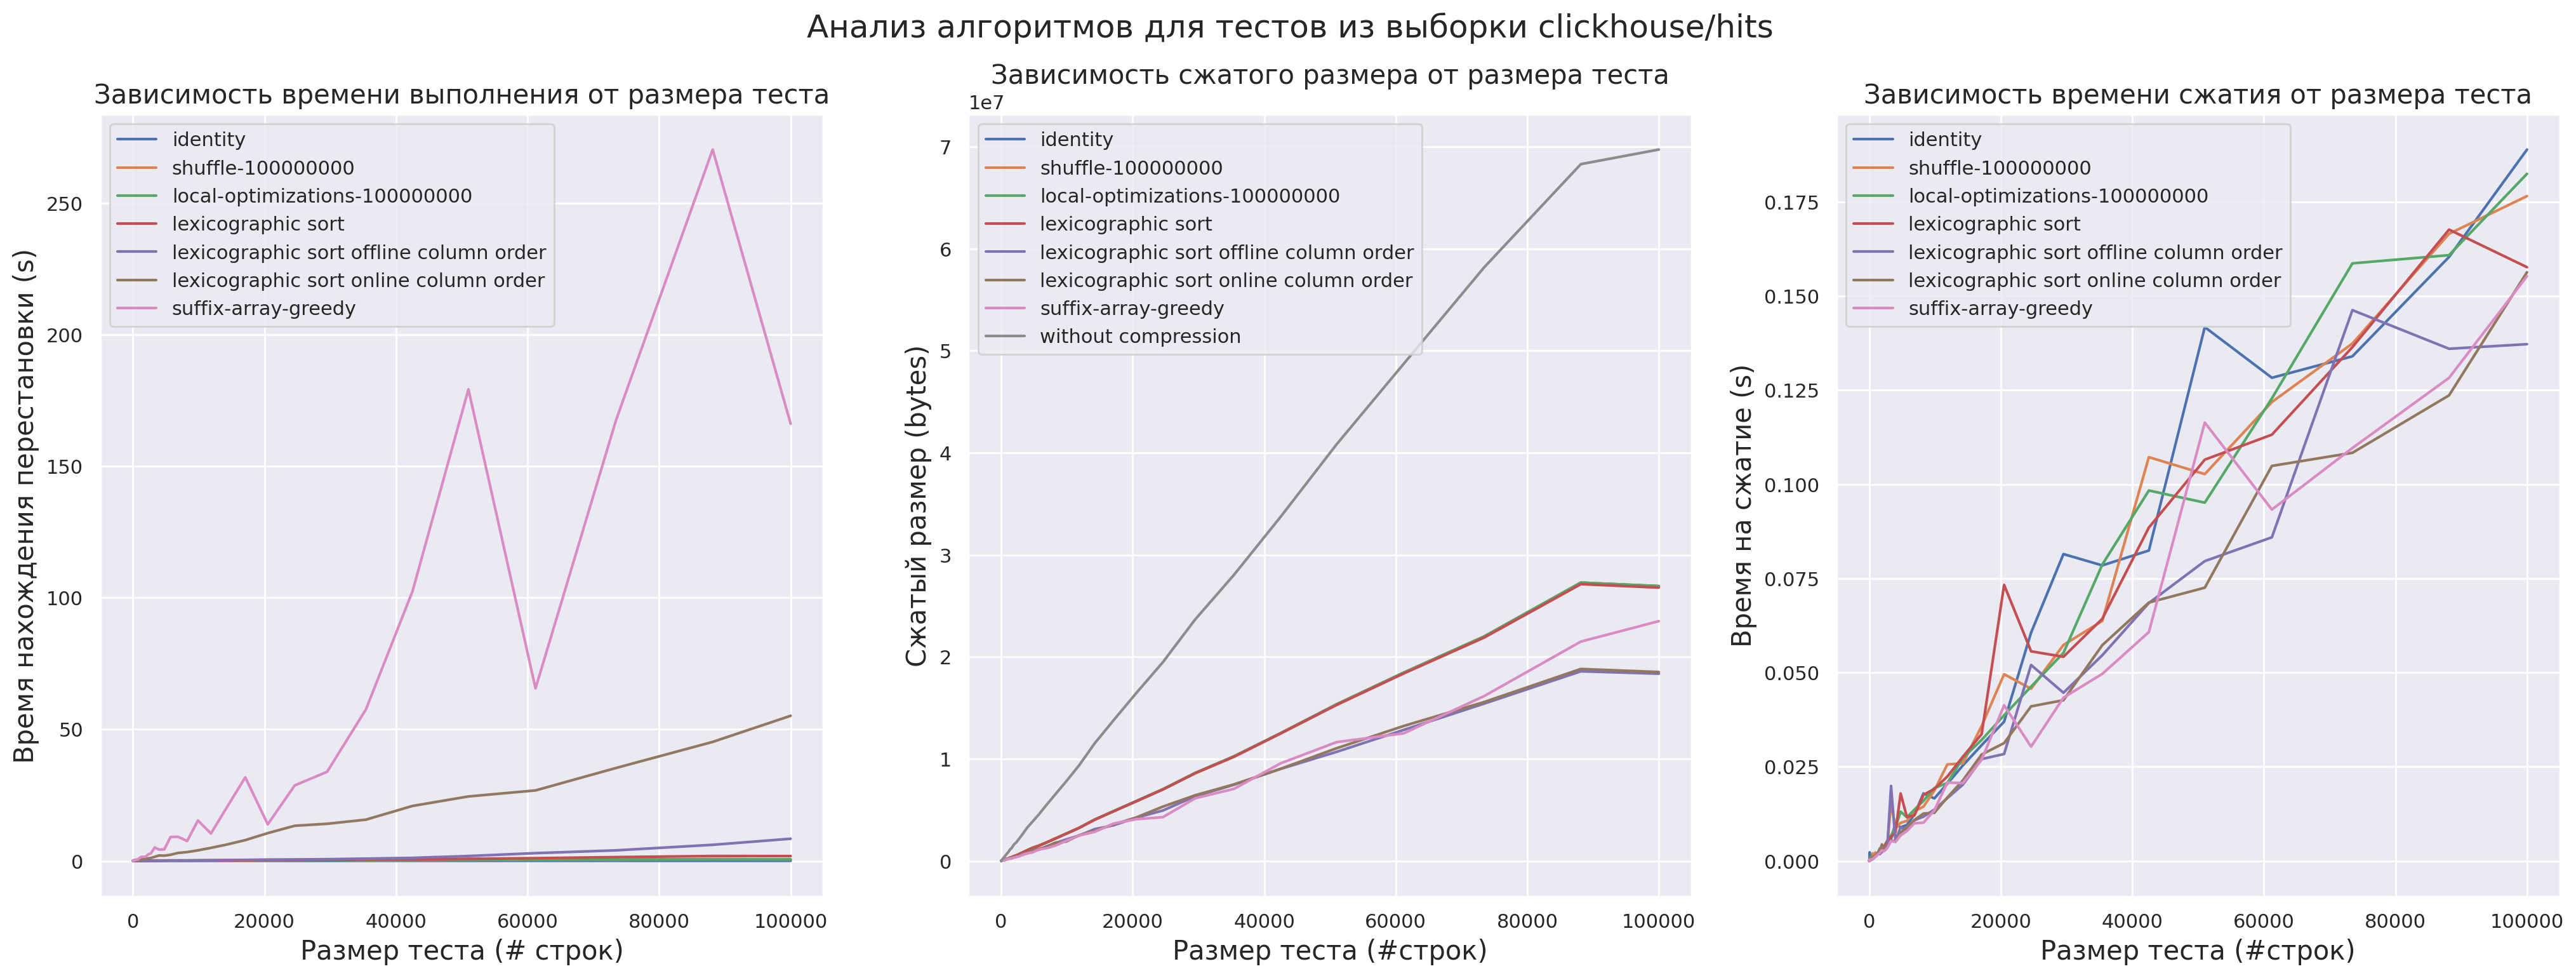

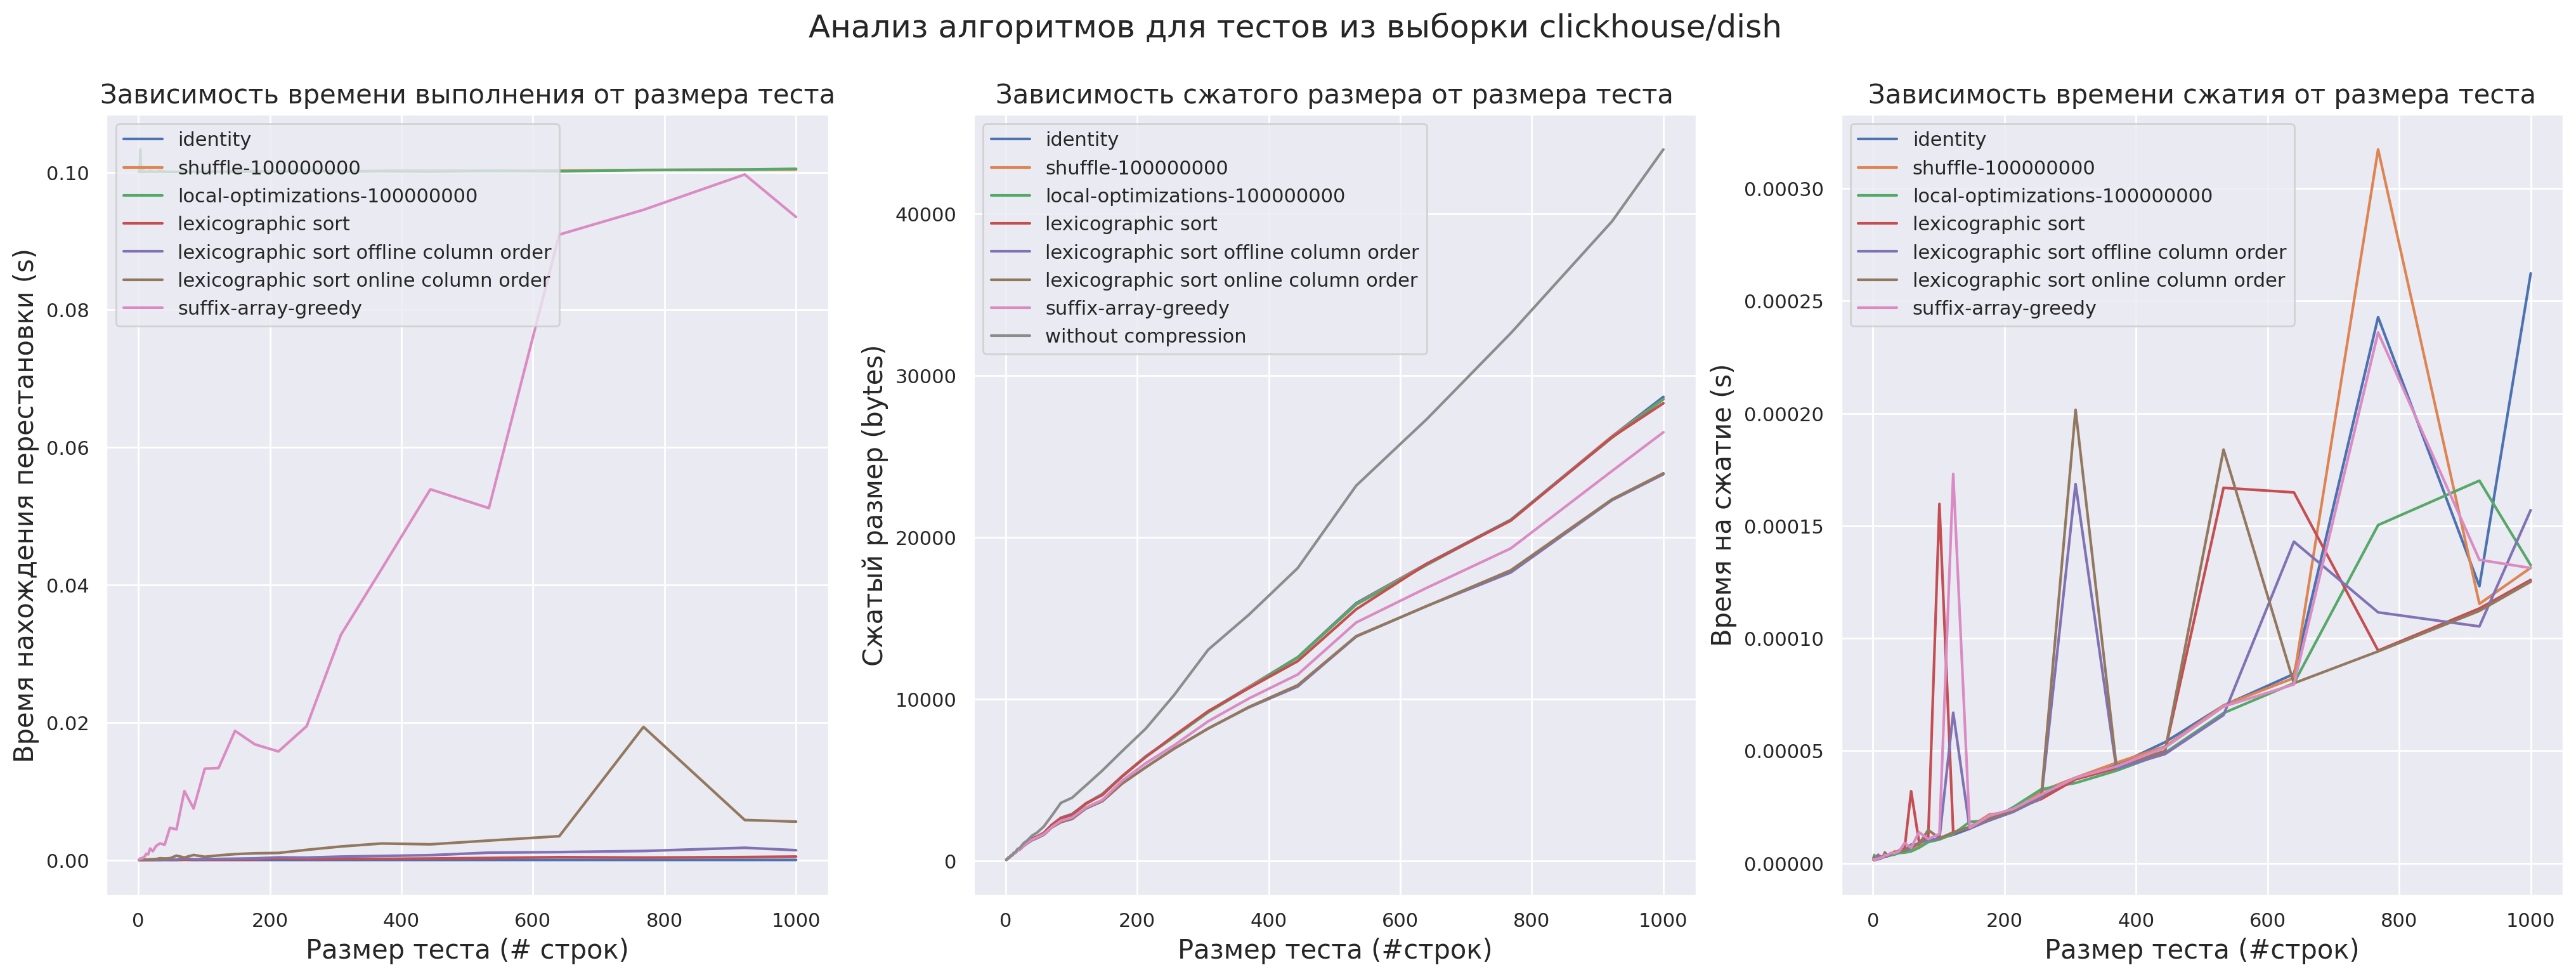

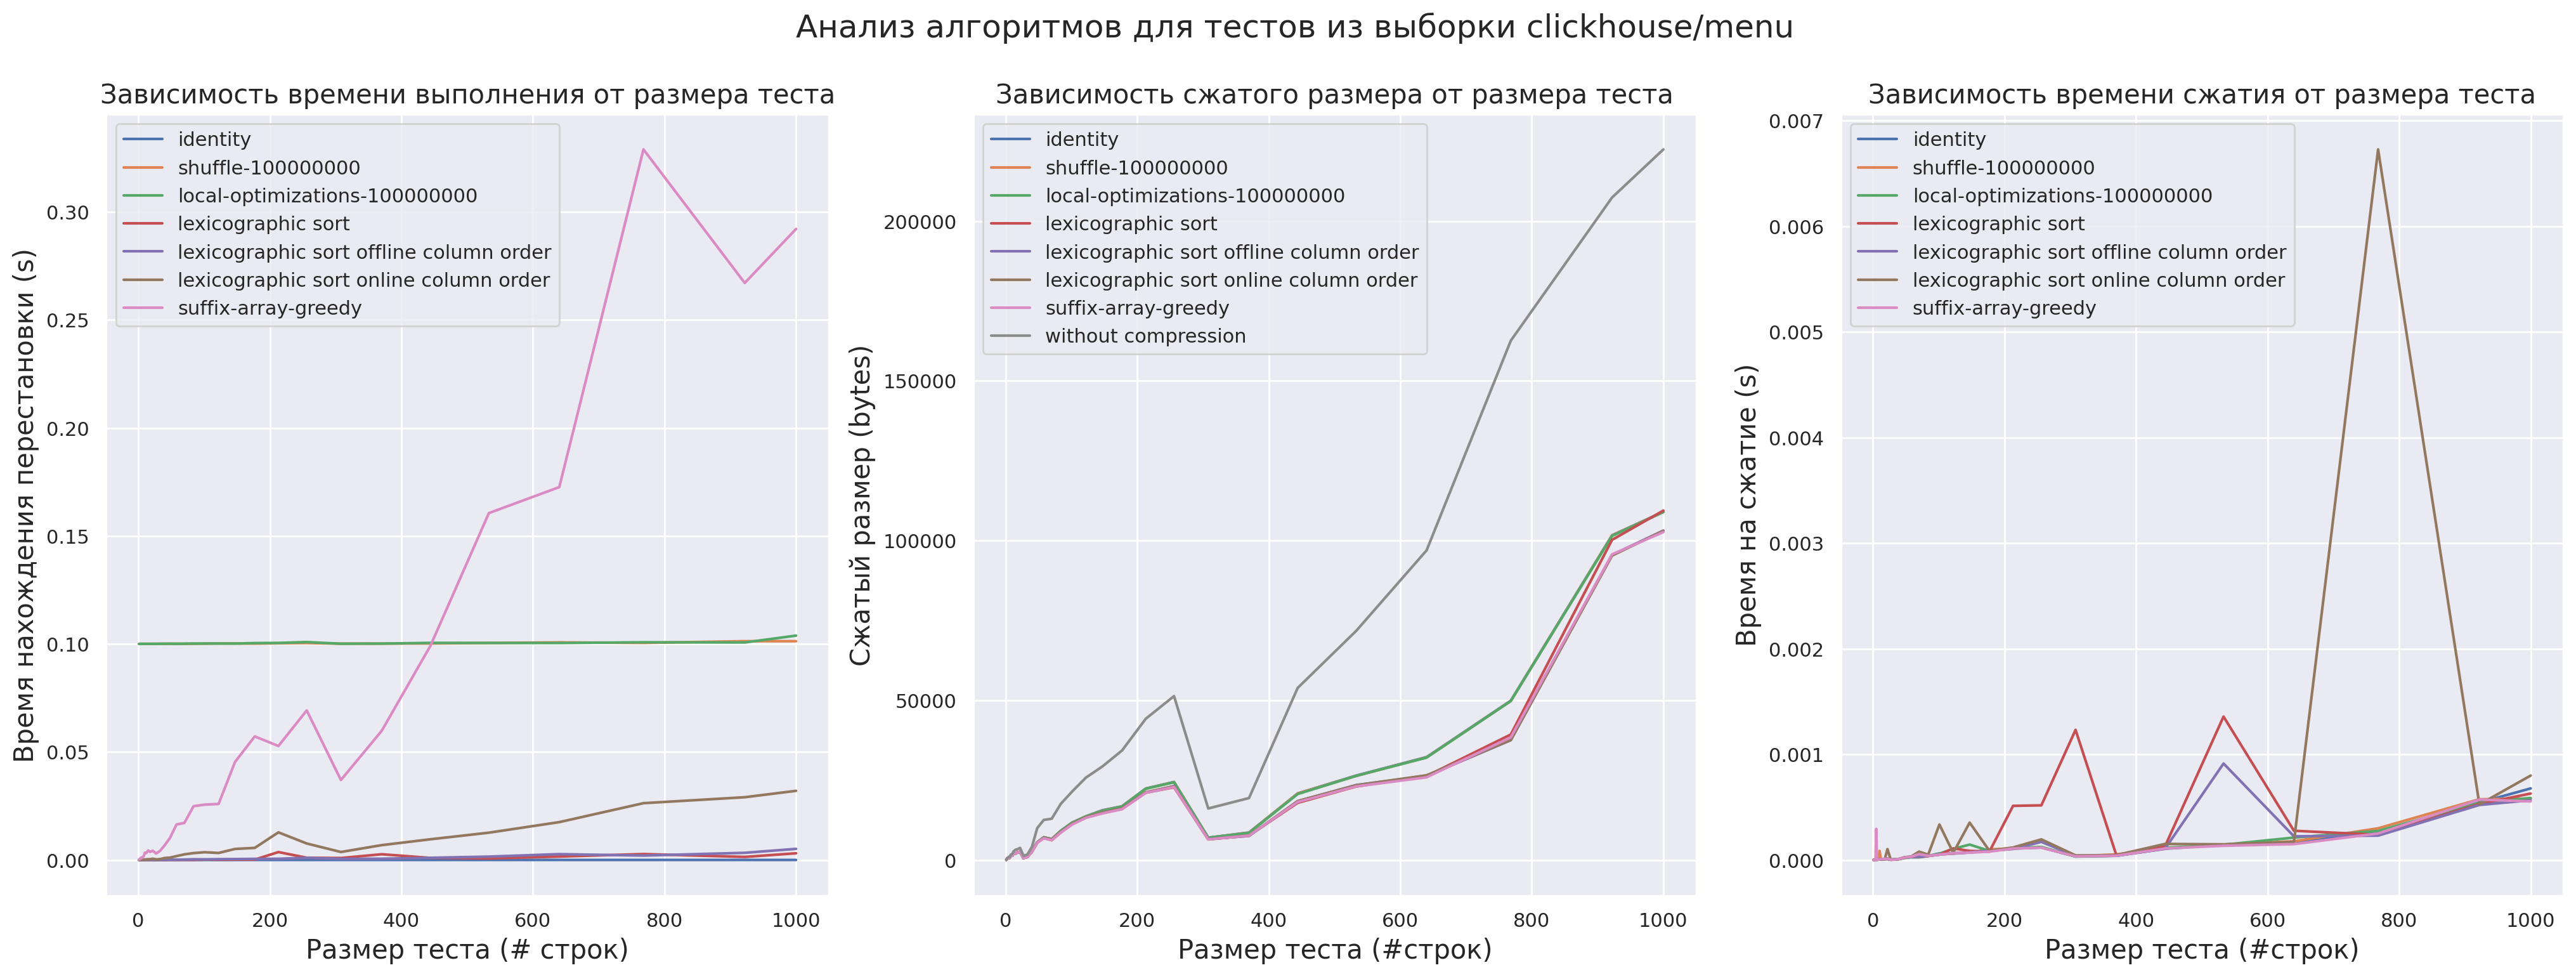

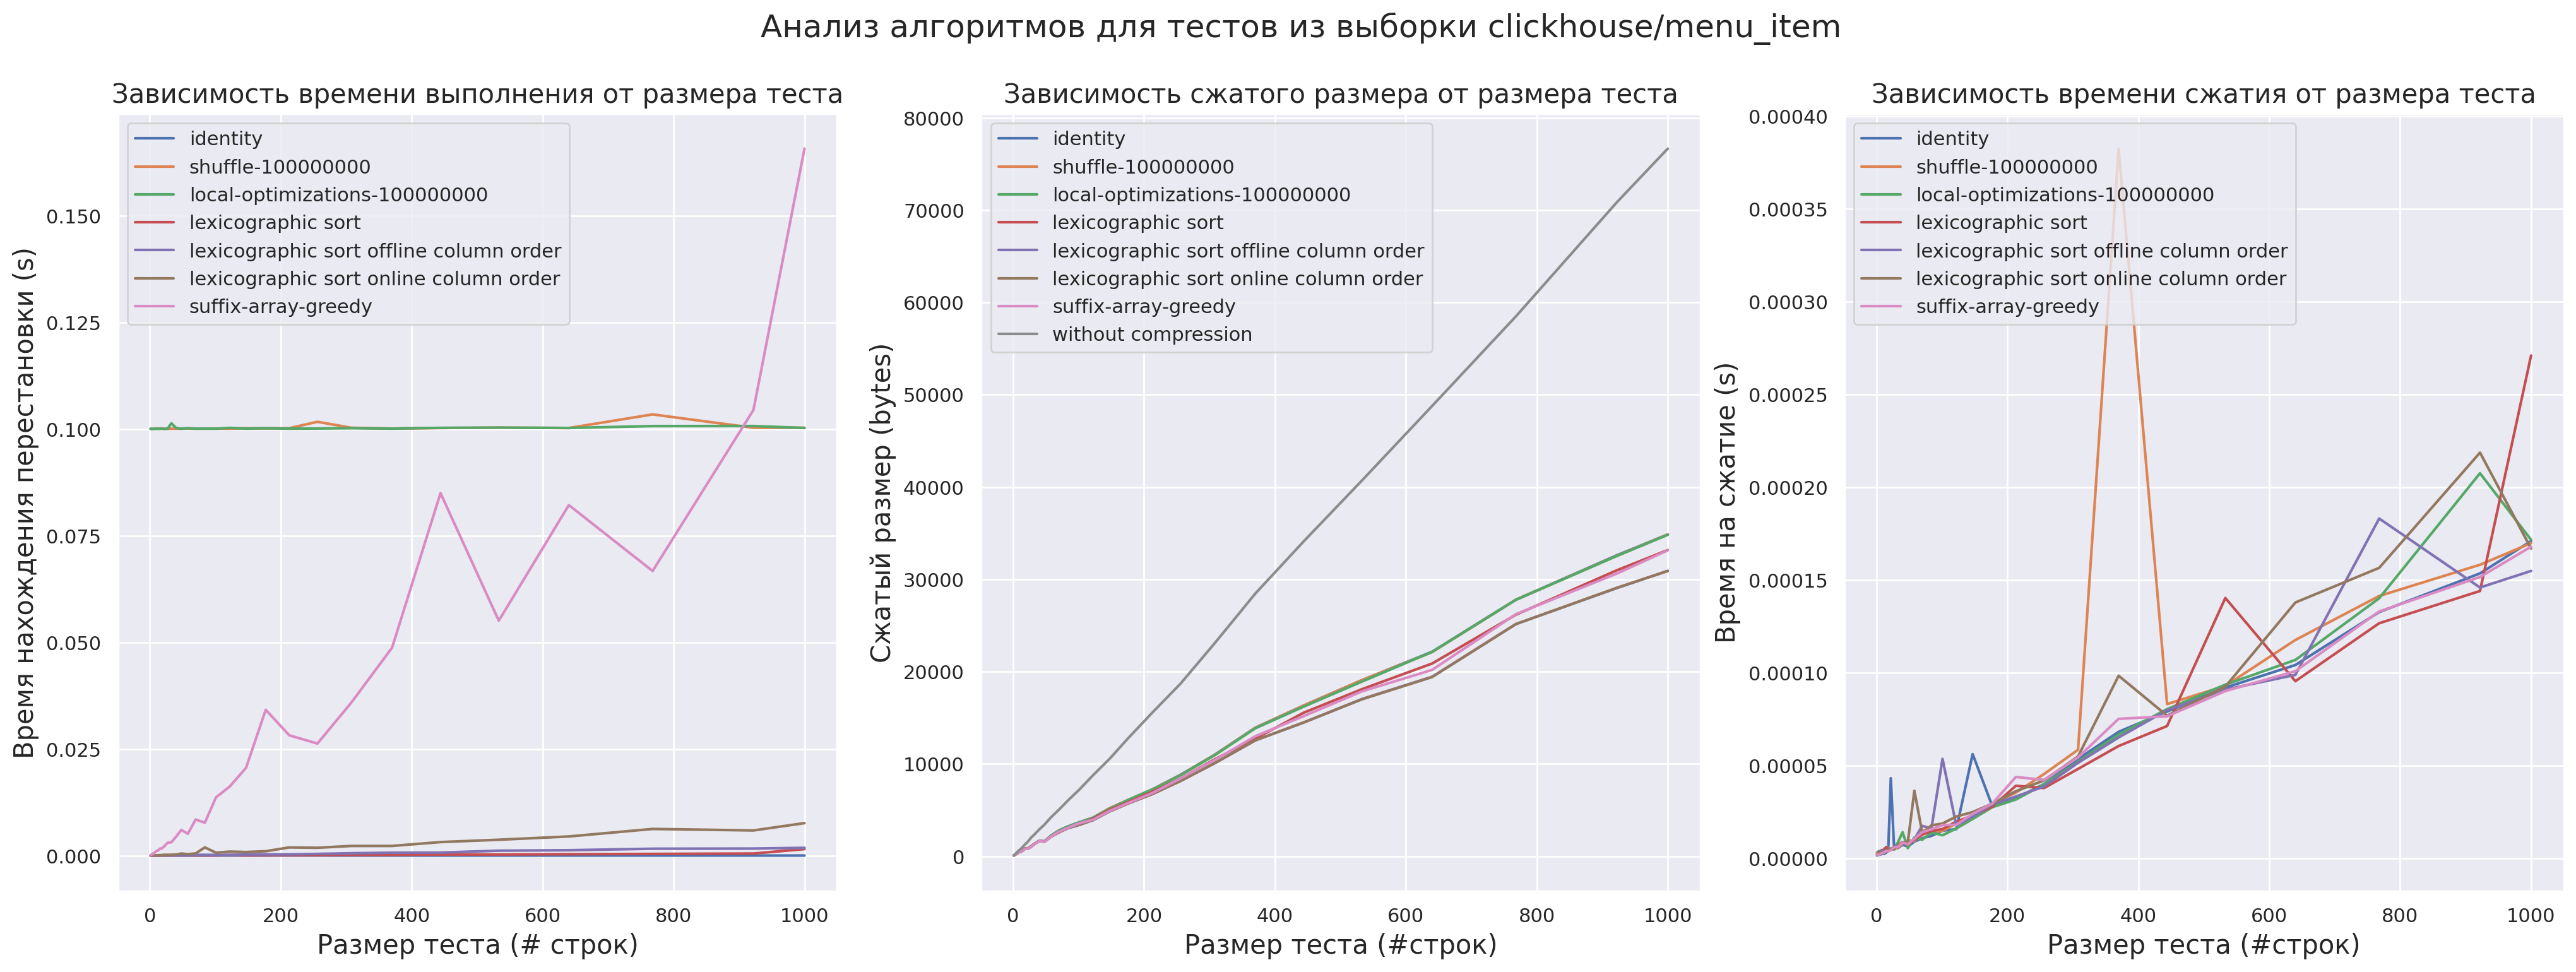

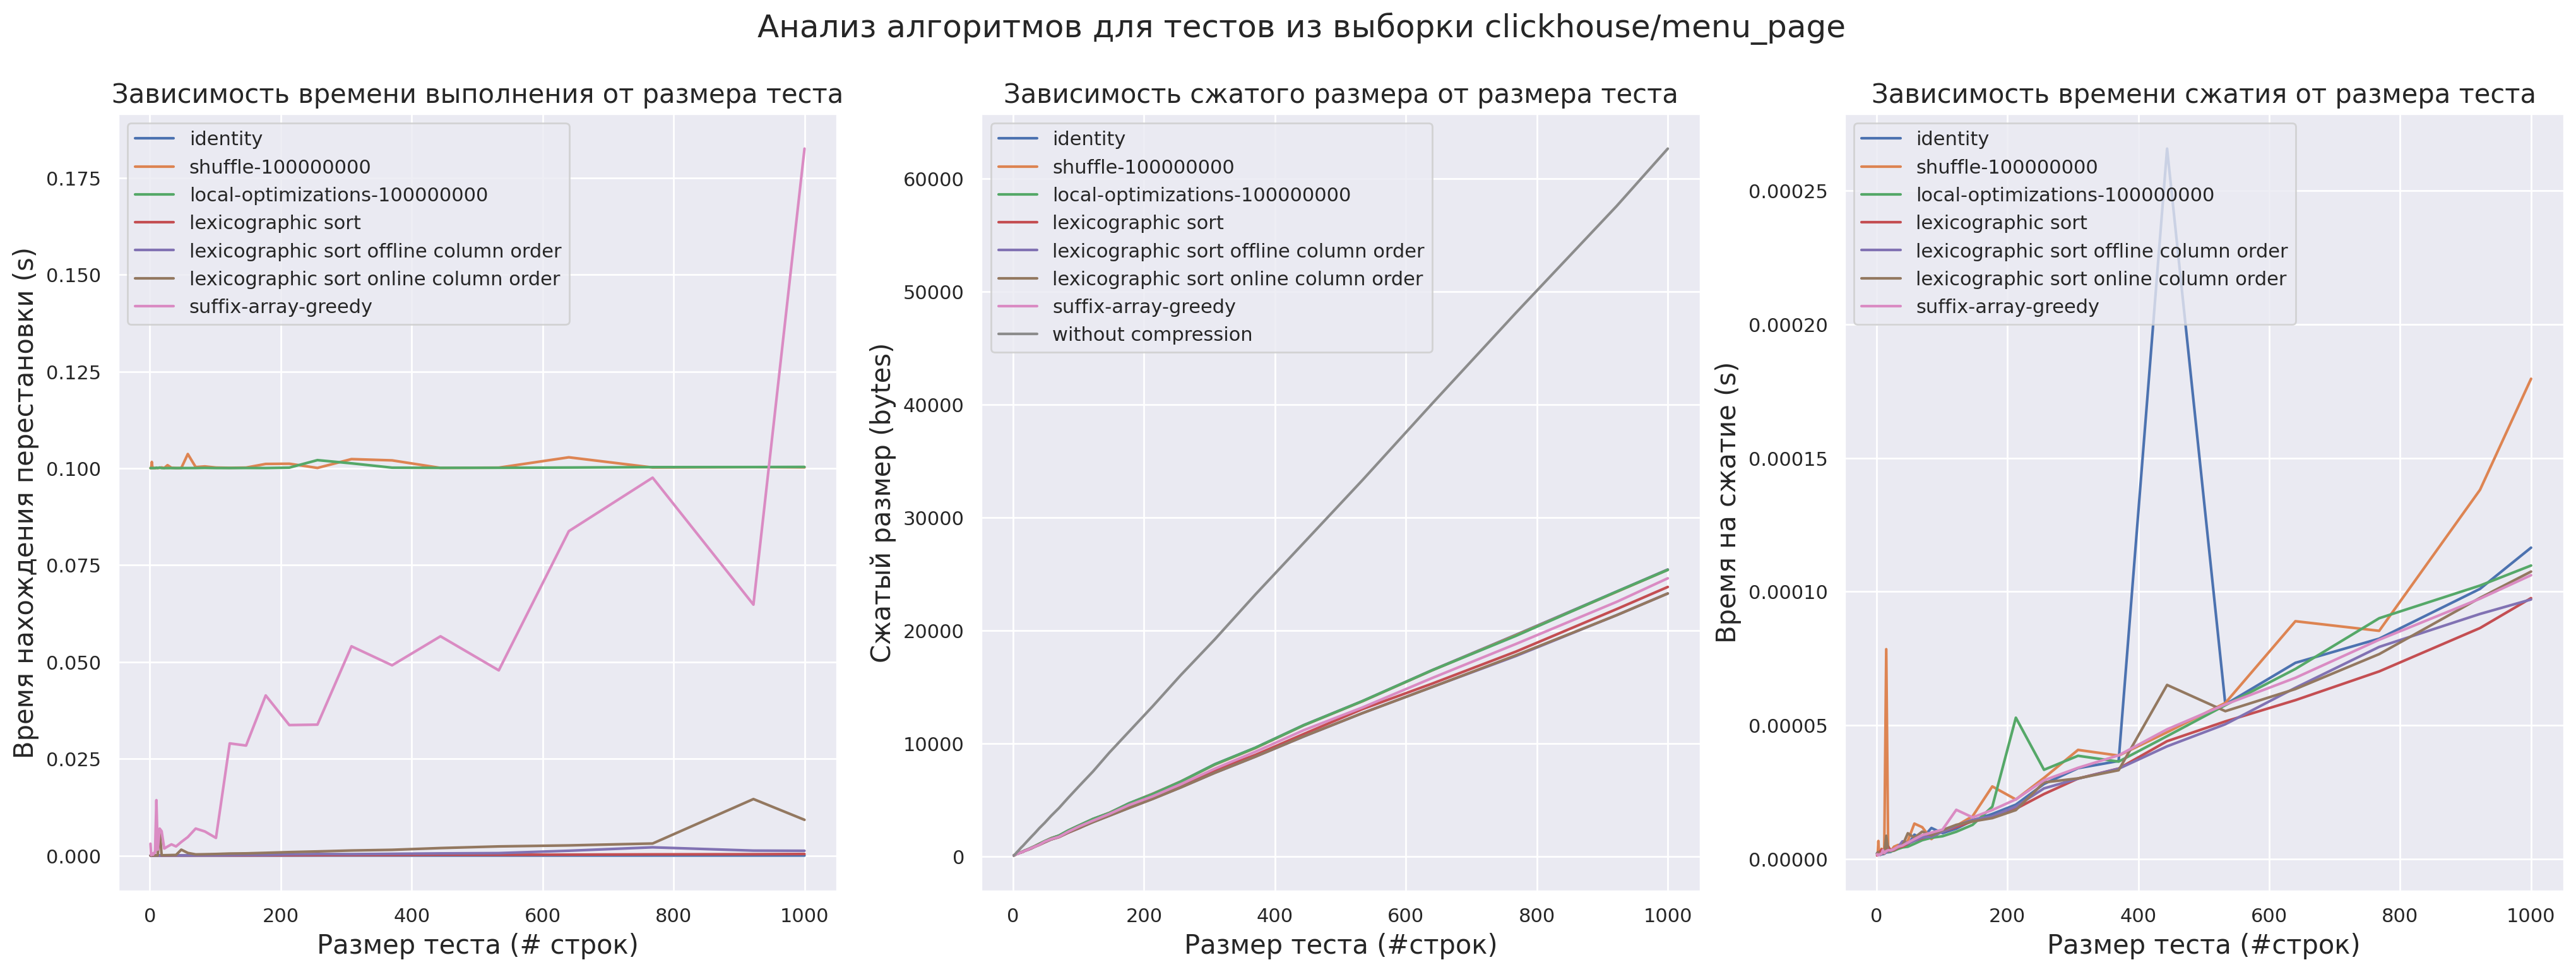

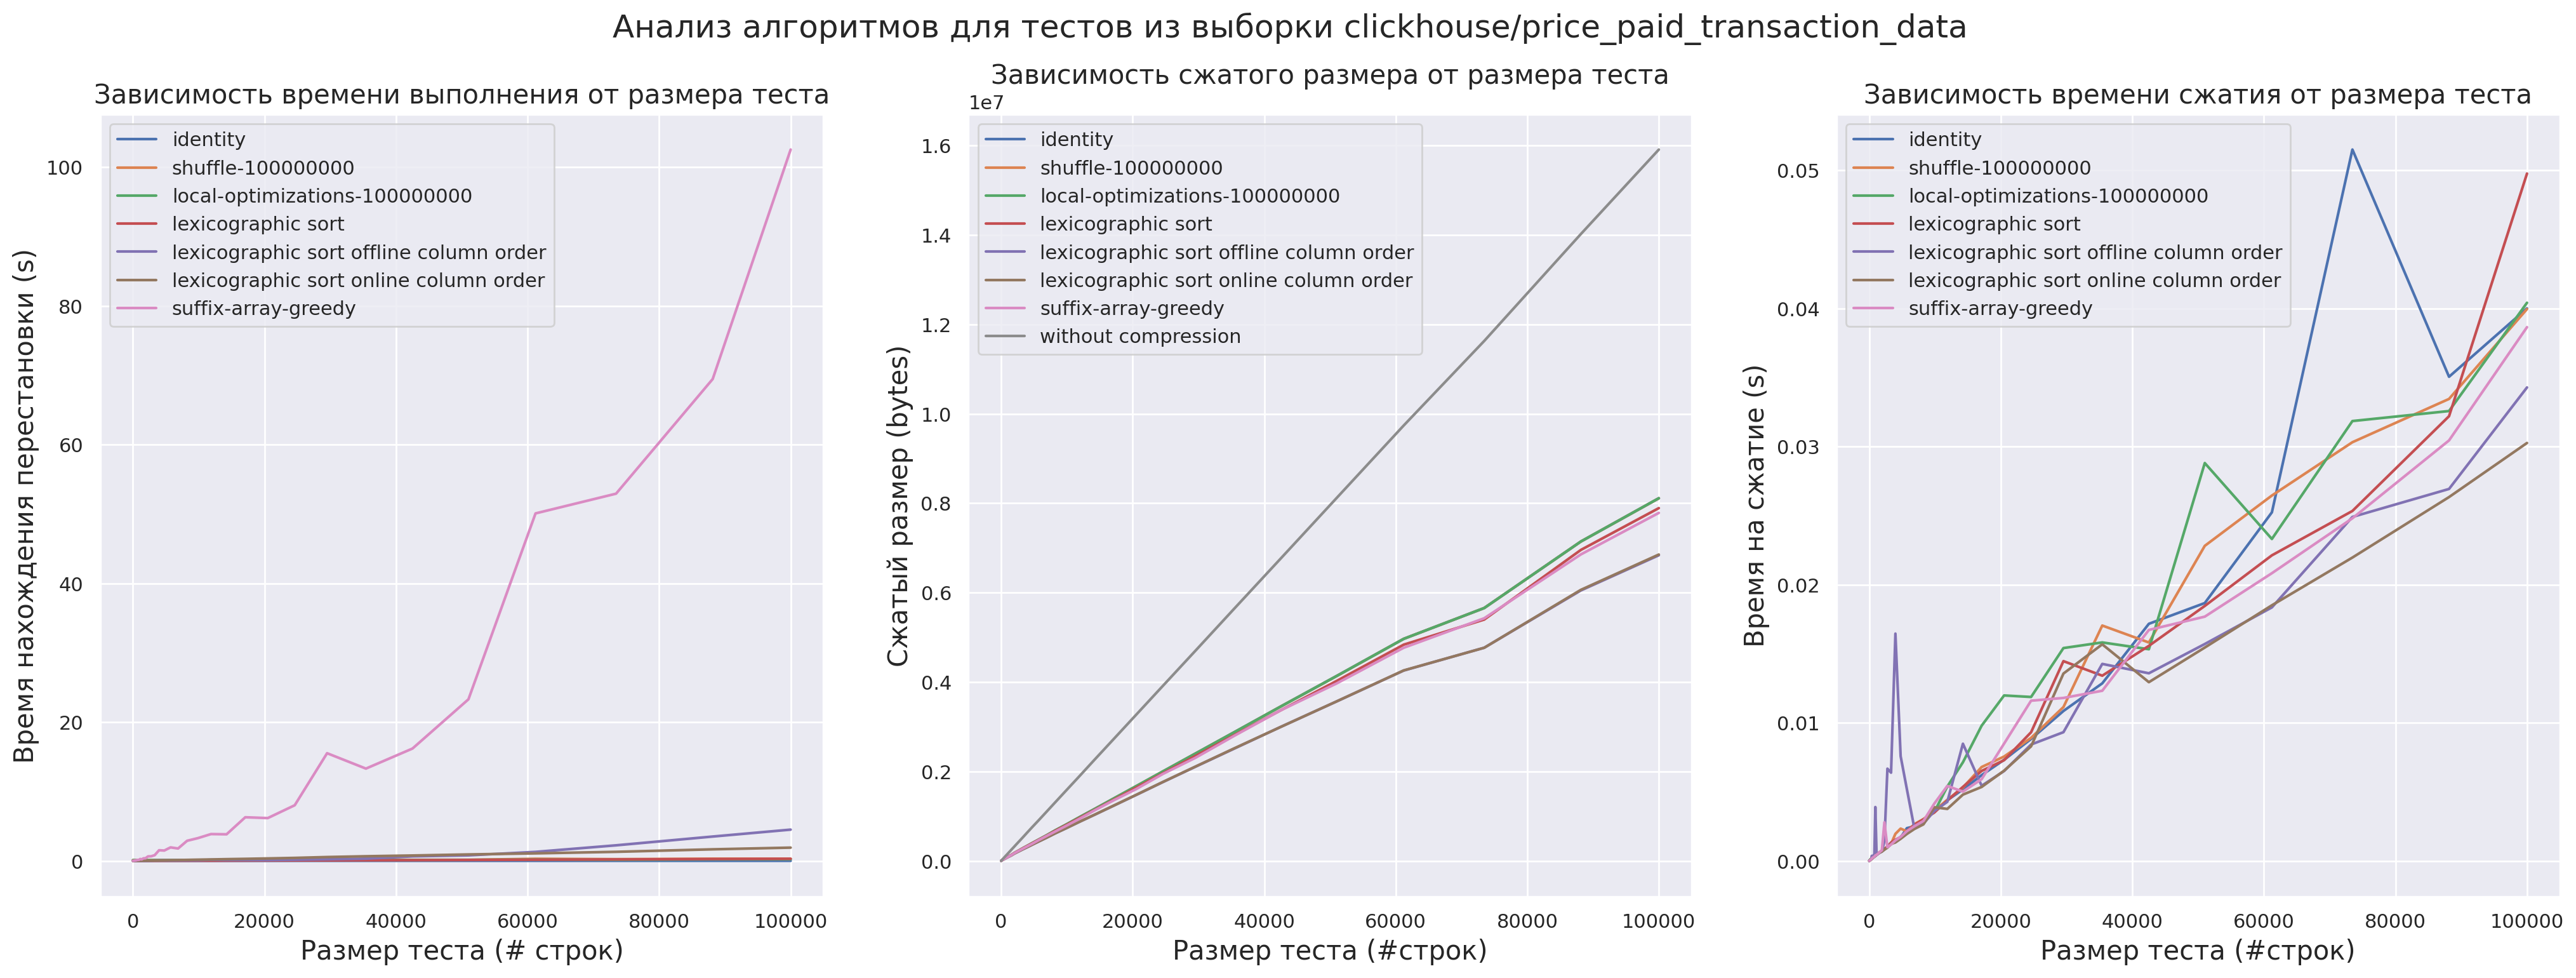

In [8]:
for test_type in tests_types:
    plot_for_test_type_compression_sorts(test_type)


In [9]:
df_clickhouse = pd.read_csv("tests_results/clickhouse_tests.csv")
df_clickhouse = prepare_df(df_clickhouse)
df_clickhouse


name  rows  columns   size  \
0           tests_data/int/random_small/1.csv     1        2    168   
1           tests_data/int/random_small/2.csv     2        2    169   
2           tests_data/int/random_small/3.csv     3        2    170   
3           tests_data/int/random_small/4.csv     4        2    171   
4           tests_data/int/random_small/5.csv     5        2    172   
..                                        ...   ...      ...    ...   
877   tests_data/clickhouse/menu_page/533.csv   533        8  15038   
878   tests_data/clickhouse/menu_page/640.csv   640        8  17072   
879   tests_data/clickhouse/menu_page/768.csv   768        8  21009   
880   tests_data/clickhouse/menu_page/922.csv   922        8  23454   
881  tests_data/clickhouse/menu_page/1000.csv  1000        8  25217   

     use_compression_optimization             test_type  
0                           False      int/random_small  
1                           False      int/random_small  
2                           False      int/random_small  
3                           False      int/random_small  
4                           False      int/random_small  
..                            ...                   ...  
877                          True  clickhouse/menu_page  
878                          True  clickhouse/menu_page  
879                          True  clickhouse/menu_page  
880                          True  clickhouse/menu_page  
881                          True  clickhouse/menu_page  

[882 rows x 6 columns]

In [10]:
def plot_for_test_type_clickhouse(test_type):
    plt.ion()
    plt.figure(figsize=(8, 5))
    plt.suptitle(f'Анализ эффективности сжатия в cickhouse для тестов из выборки {test_type}', fontsize=12)
    
    for use_compression_optimization in [True, False]:
        subset = df_clickhouse[(df_clickhouse["test_type"] == test_type) & (df_clickhouse["use_compression_optimization"] == use_compression_optimization)]
        plt.plot(subset['rows'], subset['size'], label=f"optimize={use_compression_optimization}")

    plt.legend(loc='upper left')
    plt.xlabel('Размер теста (#строк)', fontsize = 10)
    plt.ylabel('Размер (bytes)', fontsize = 10)

    plt.show()


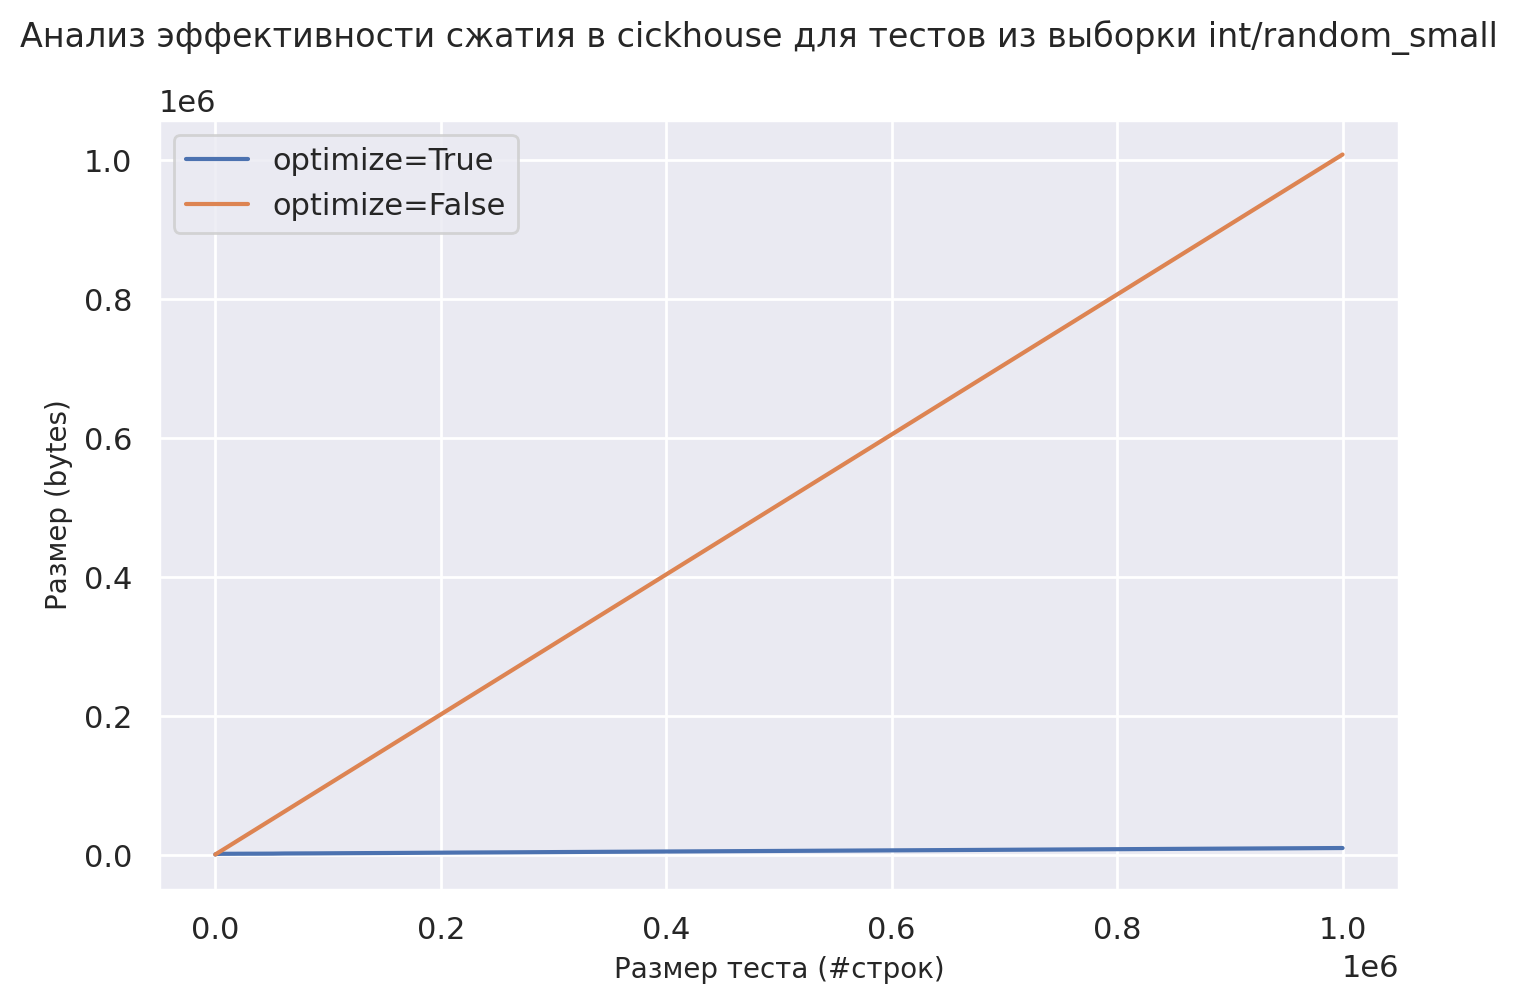

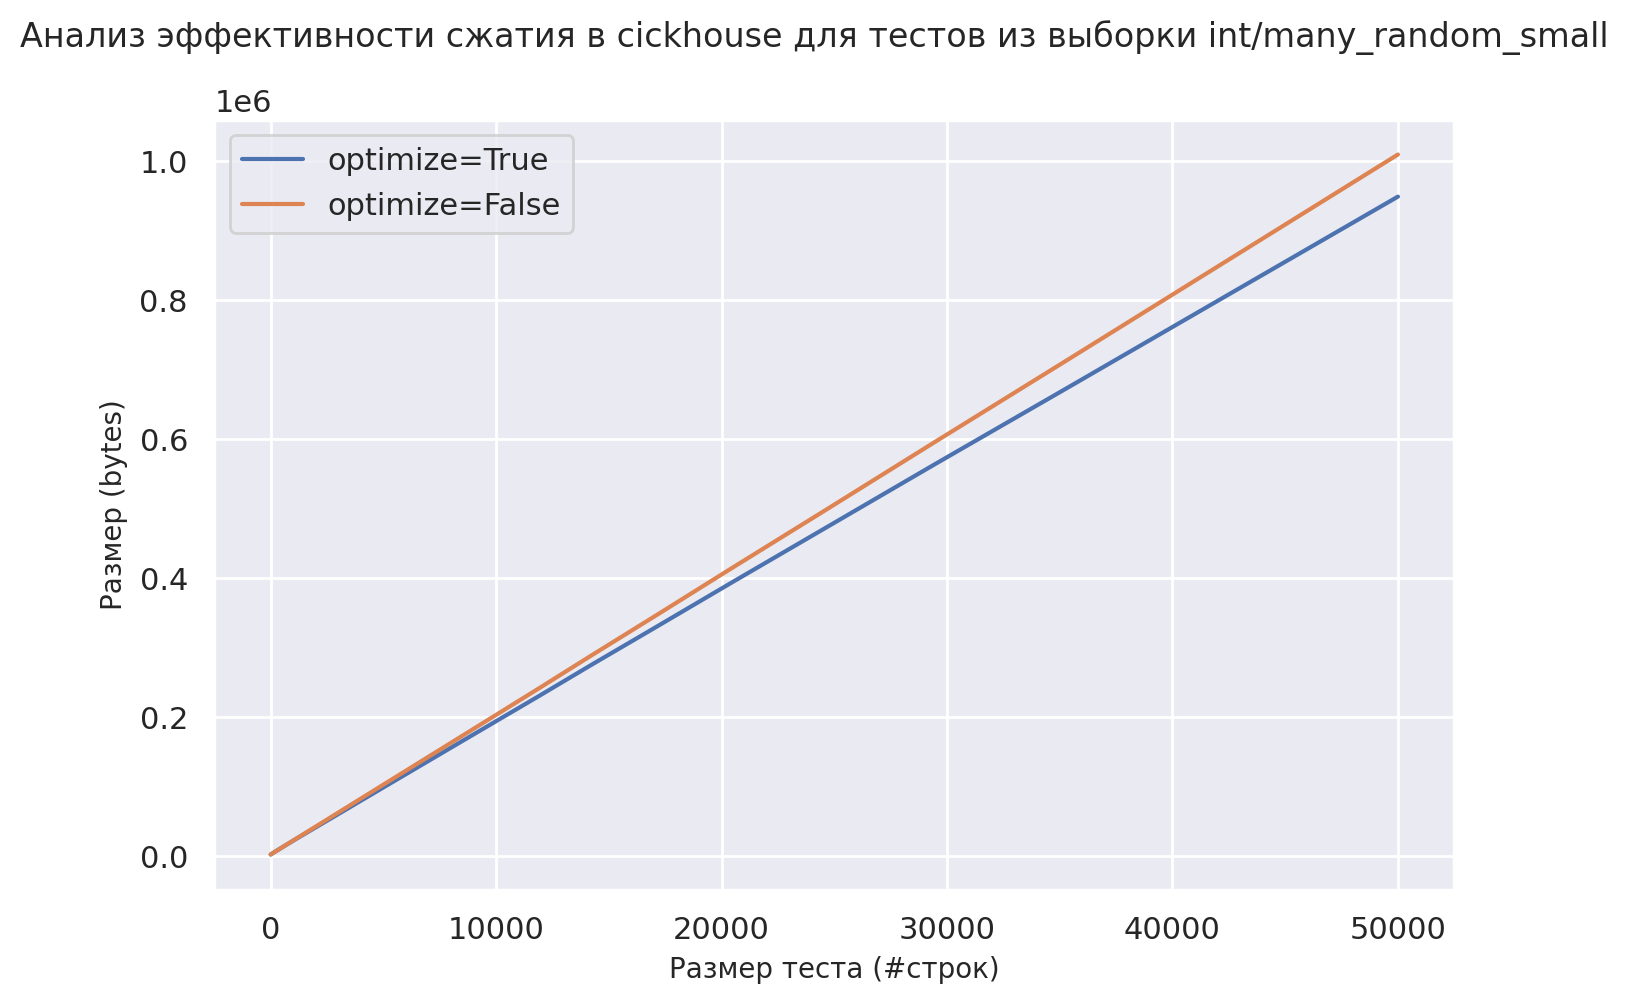

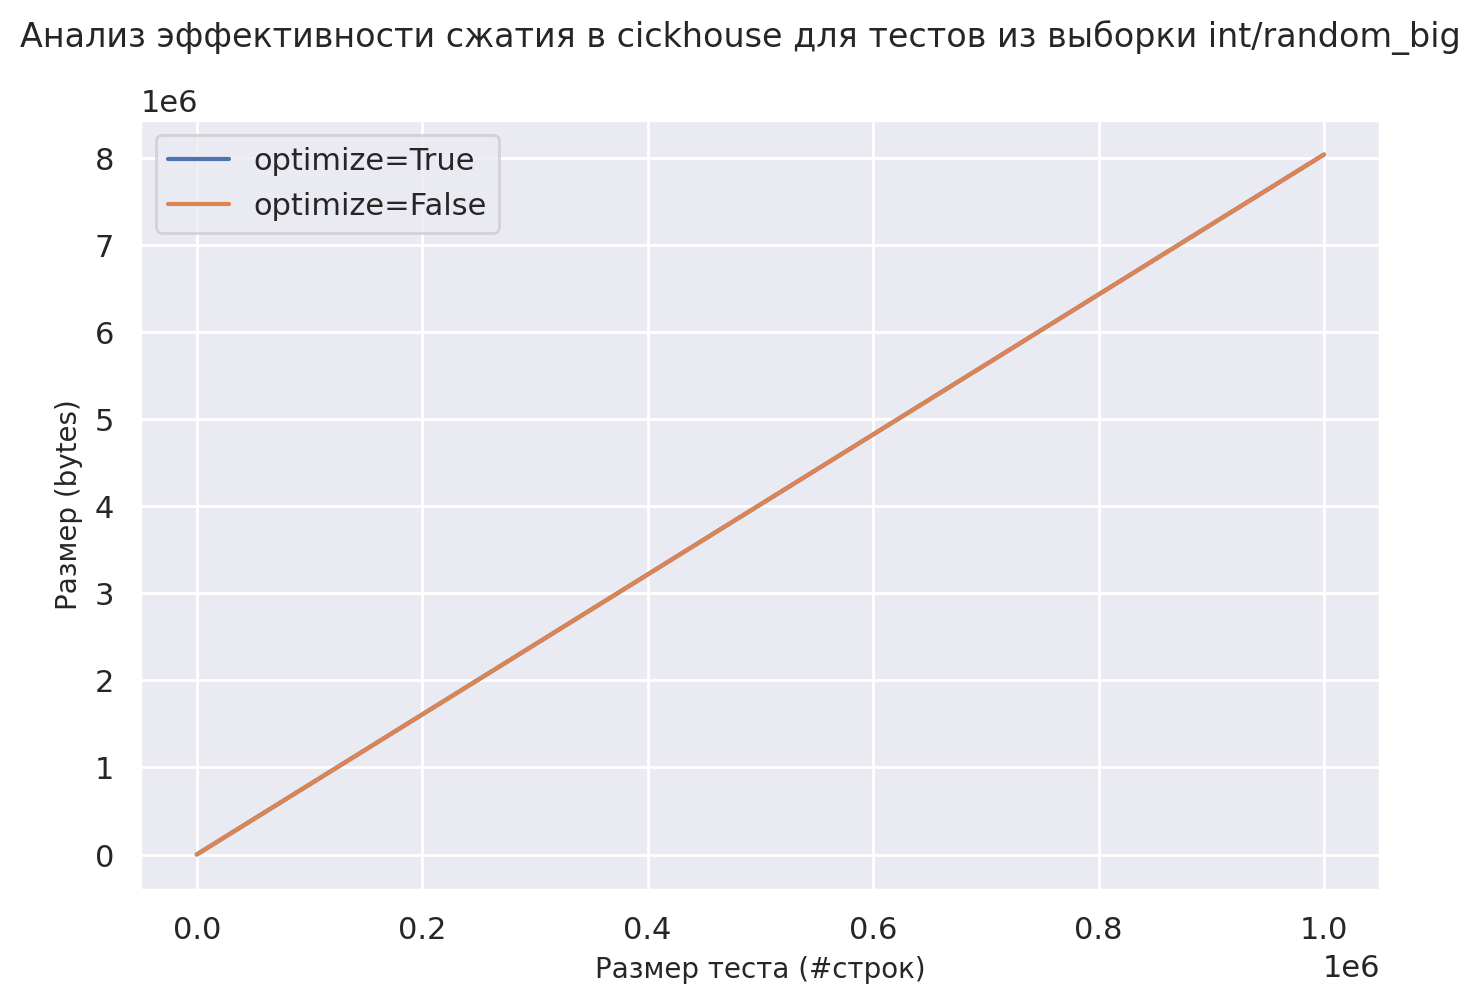

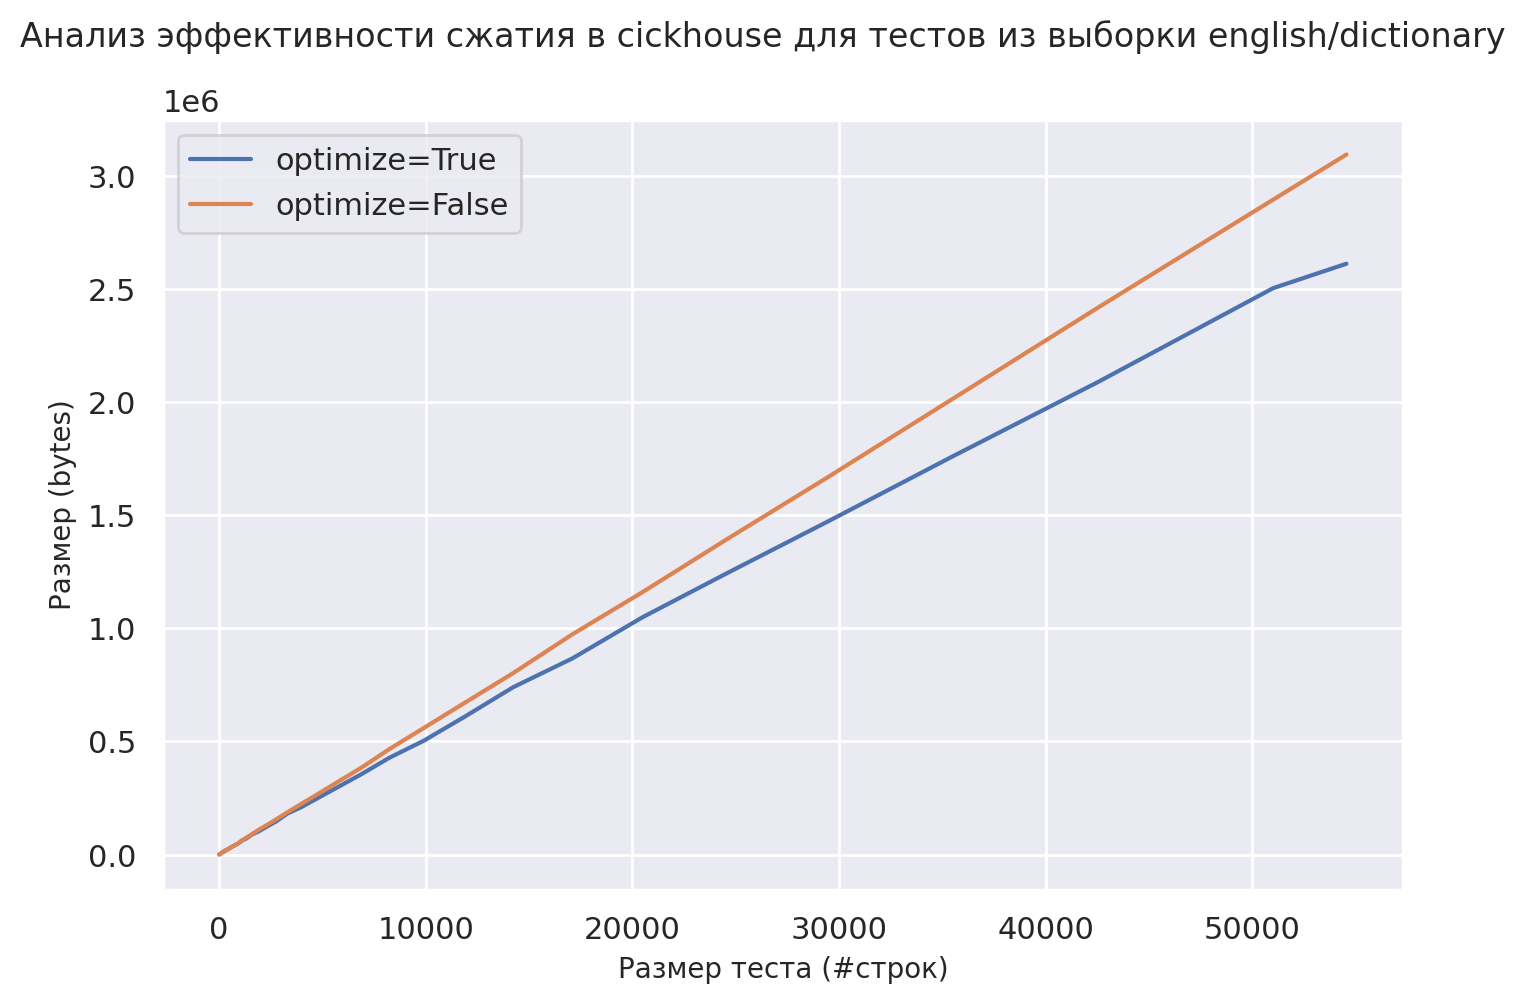

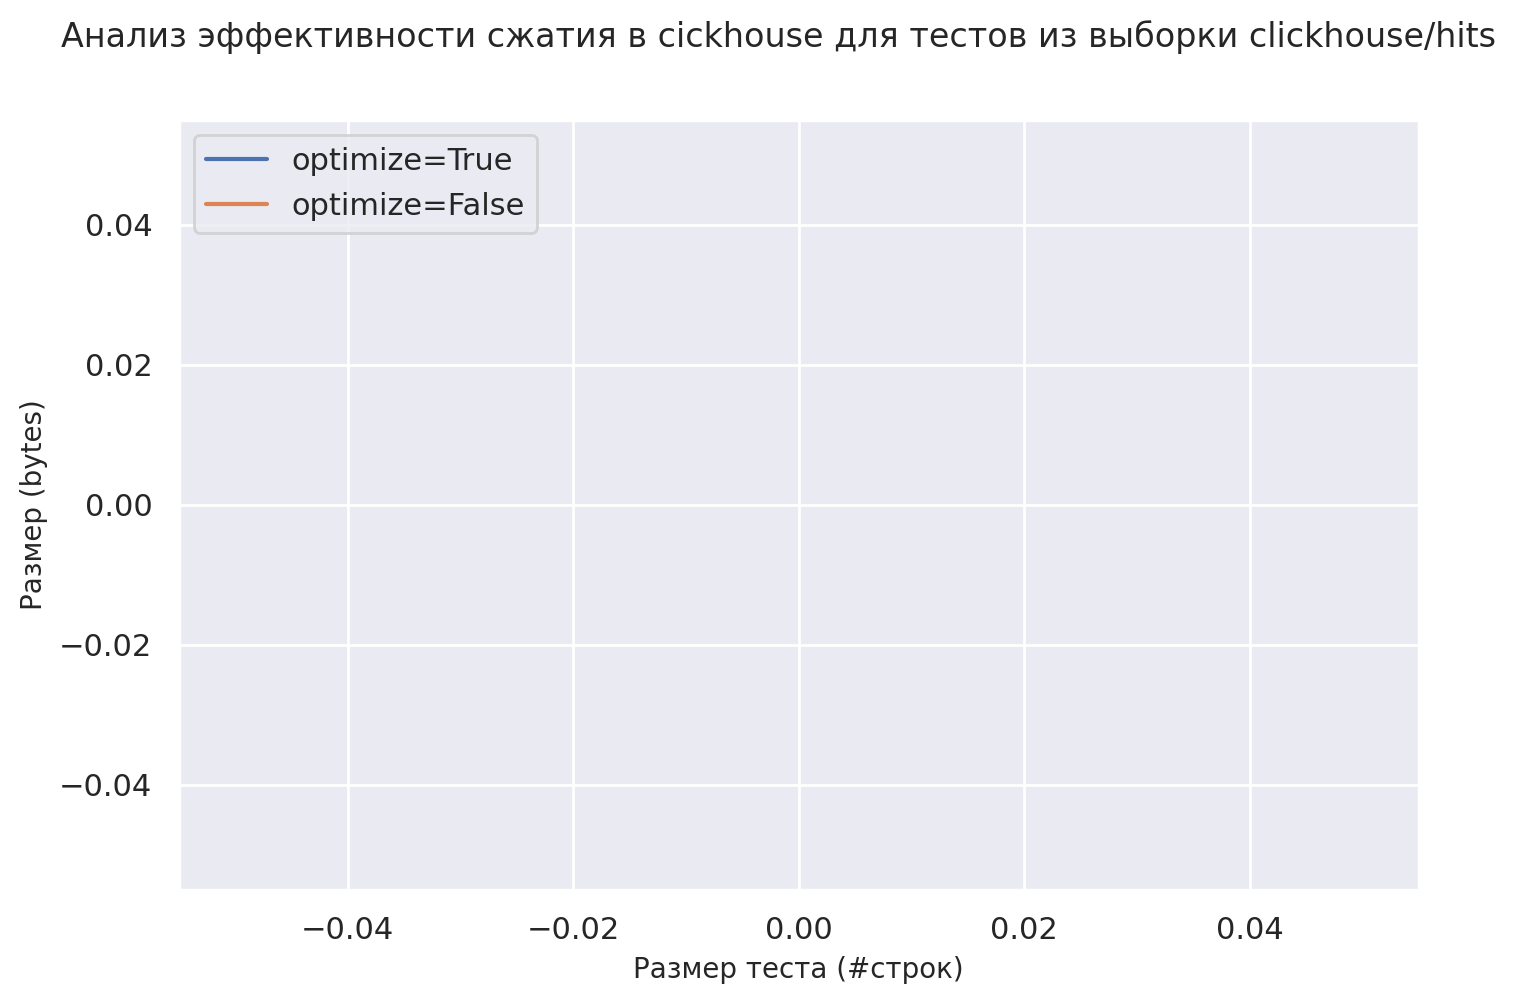

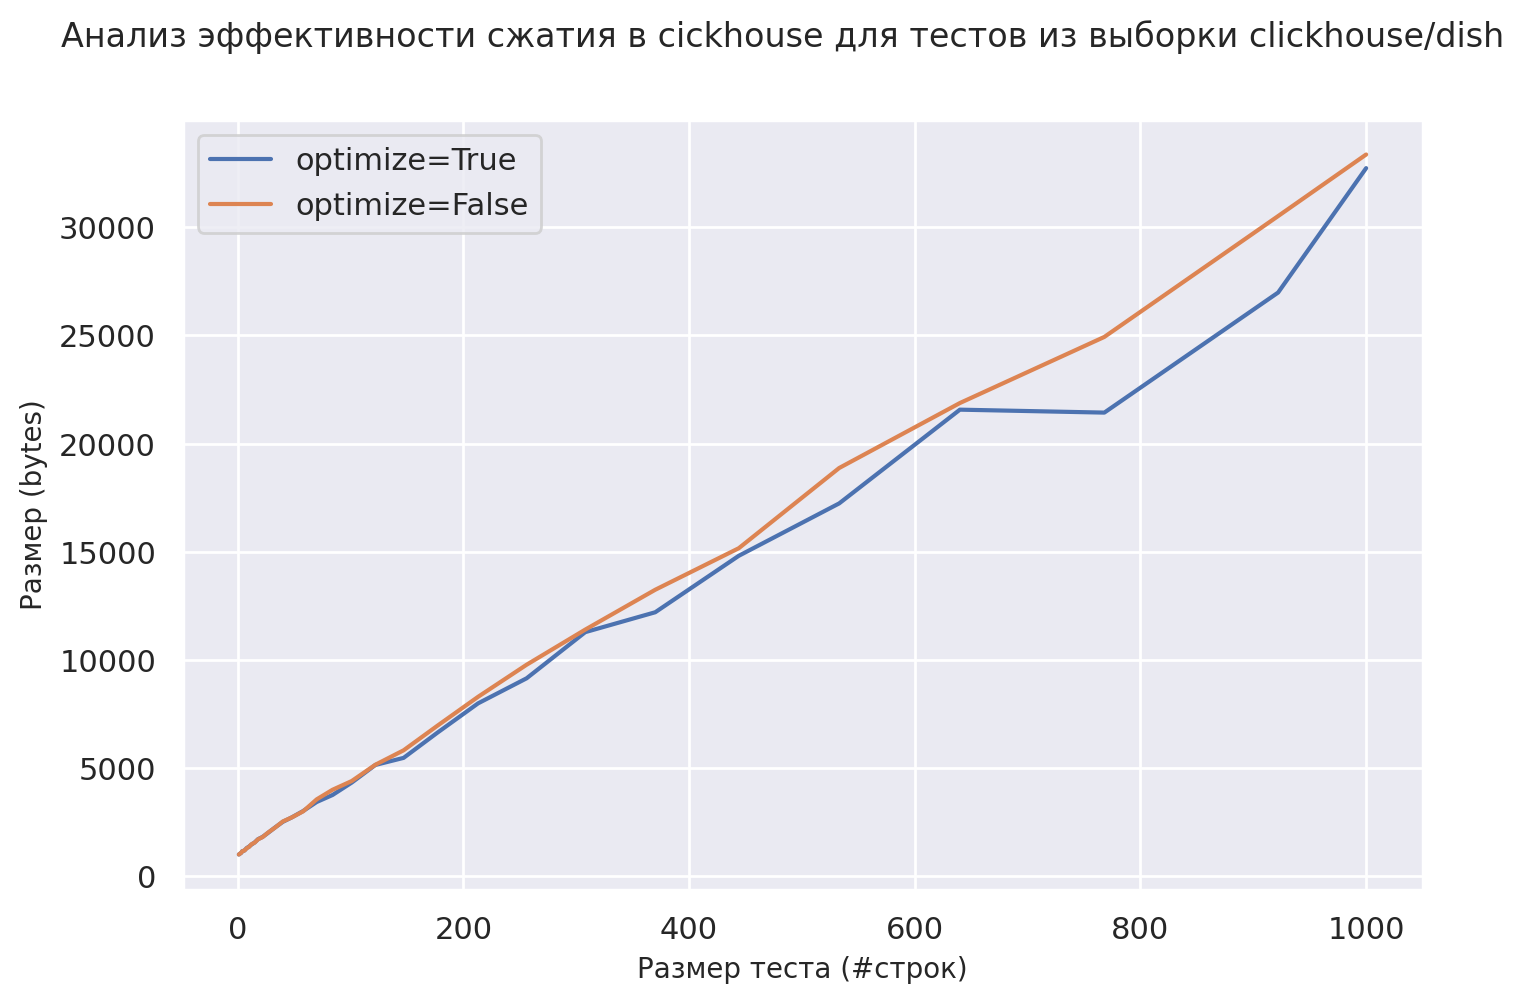

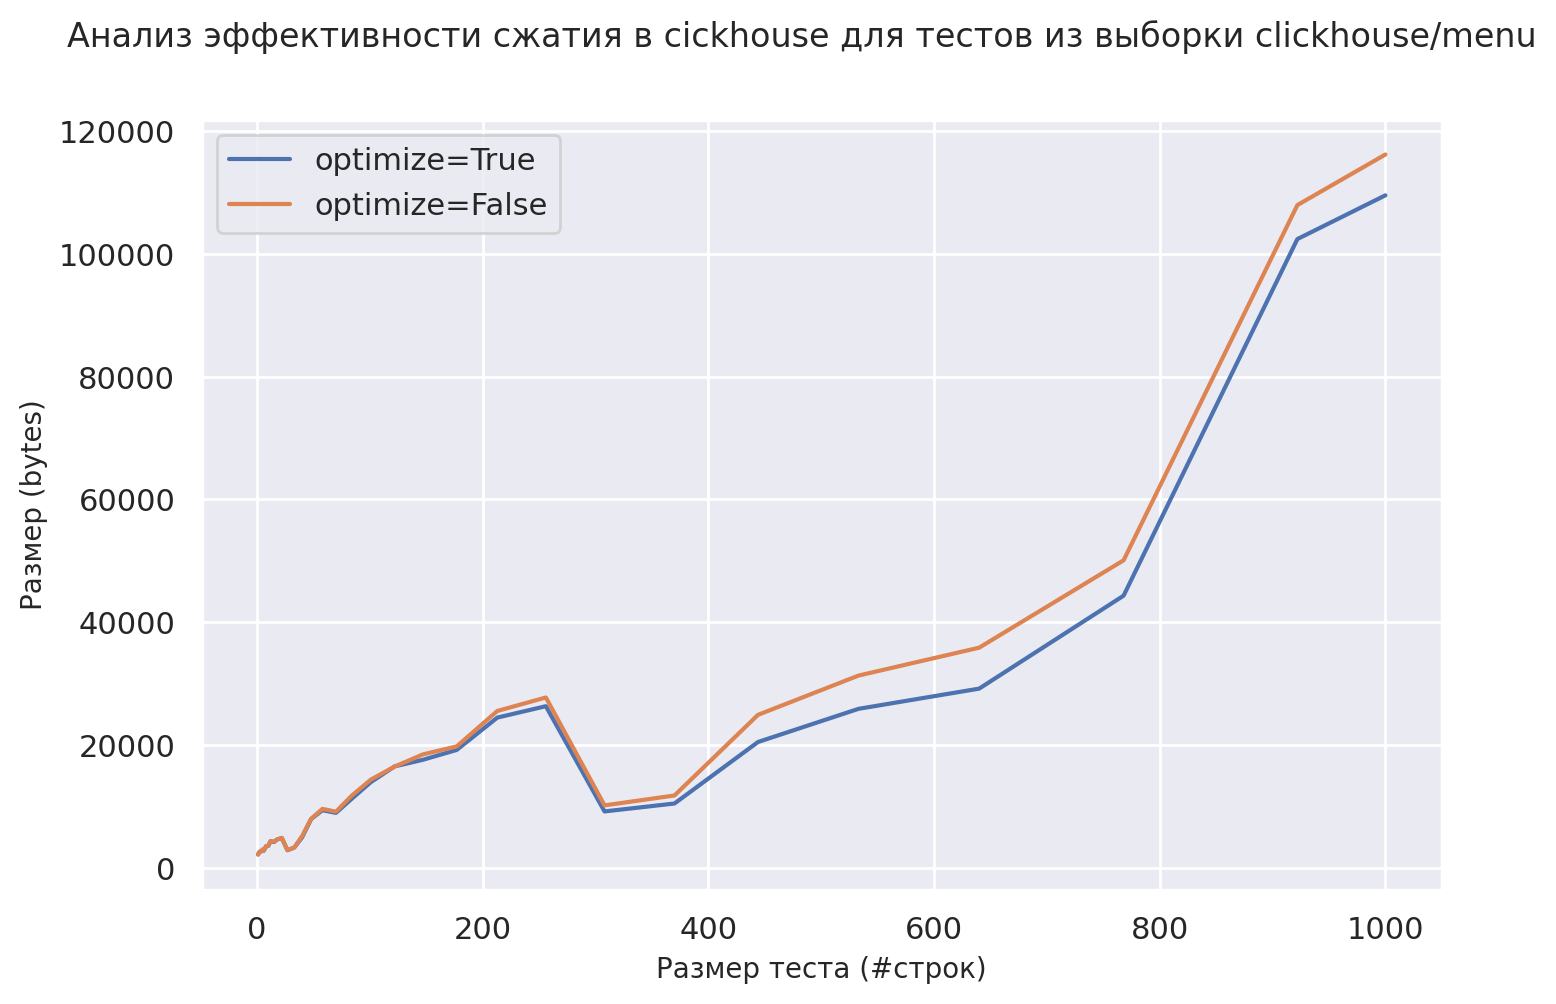

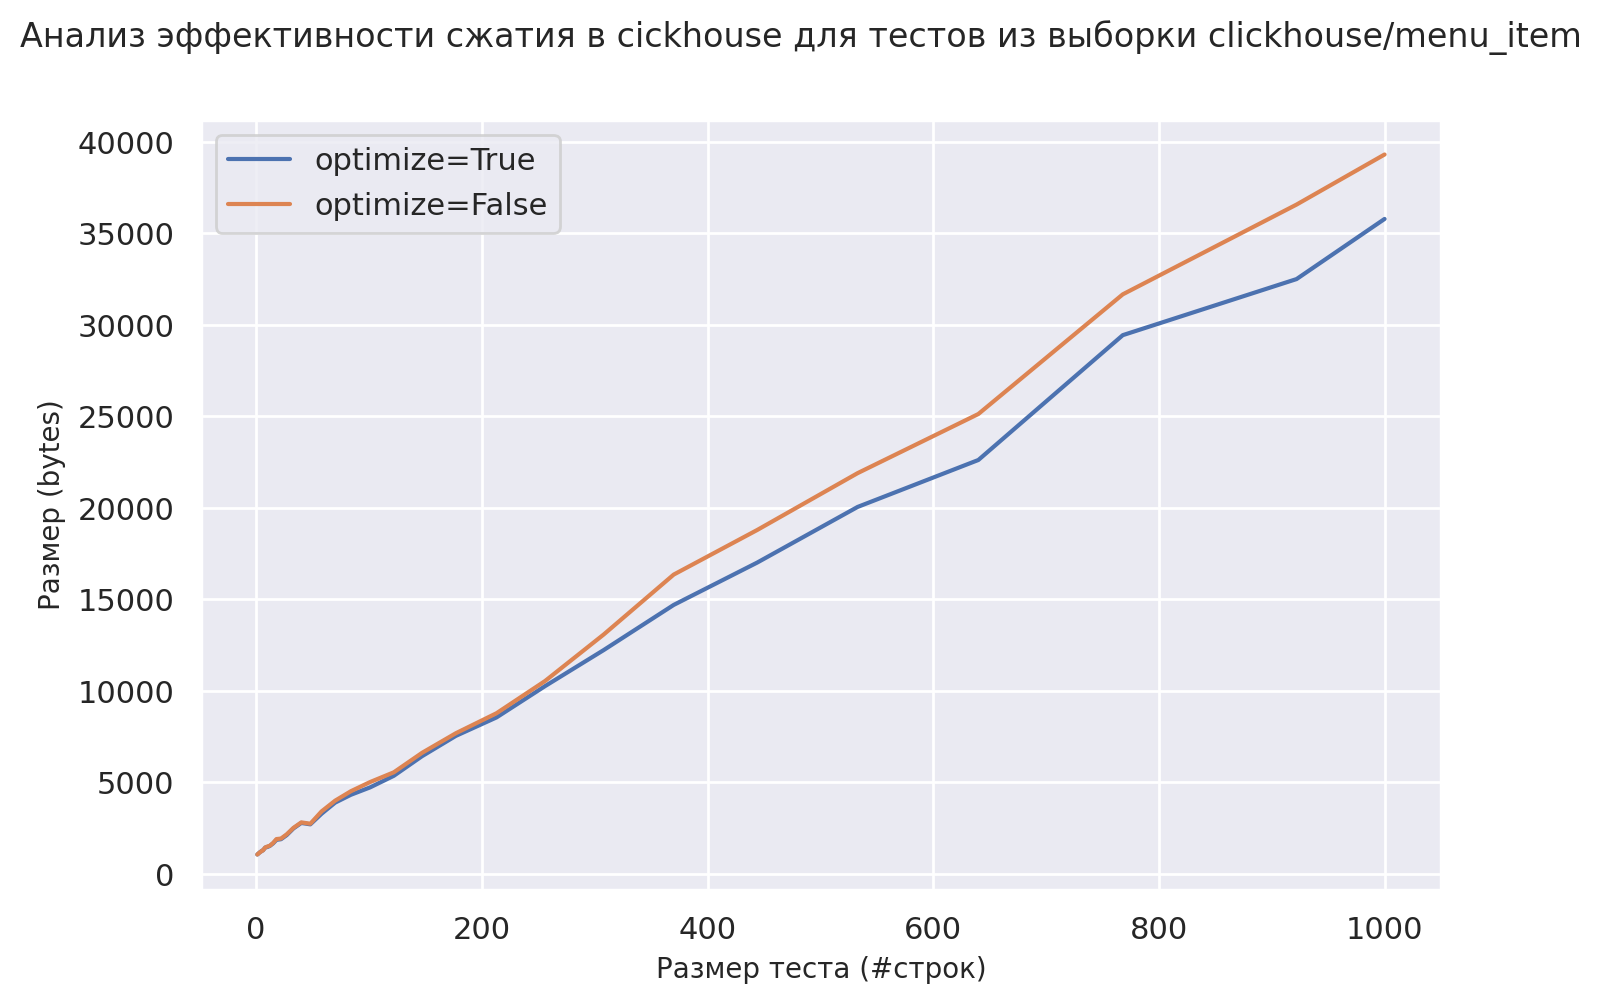

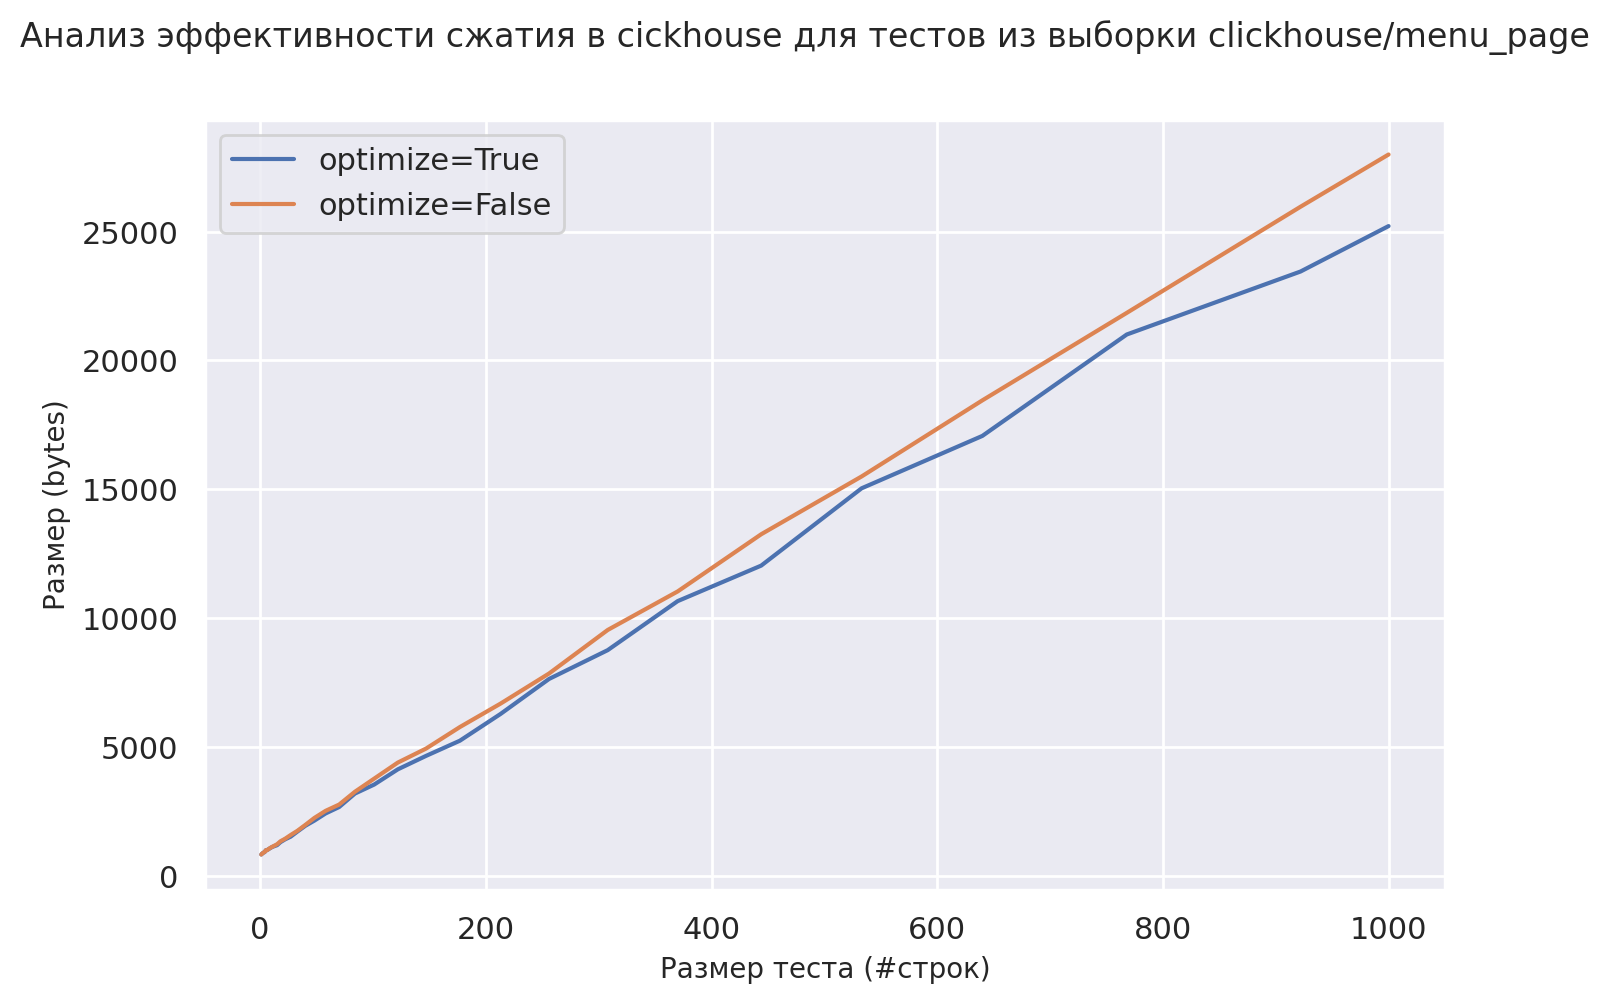

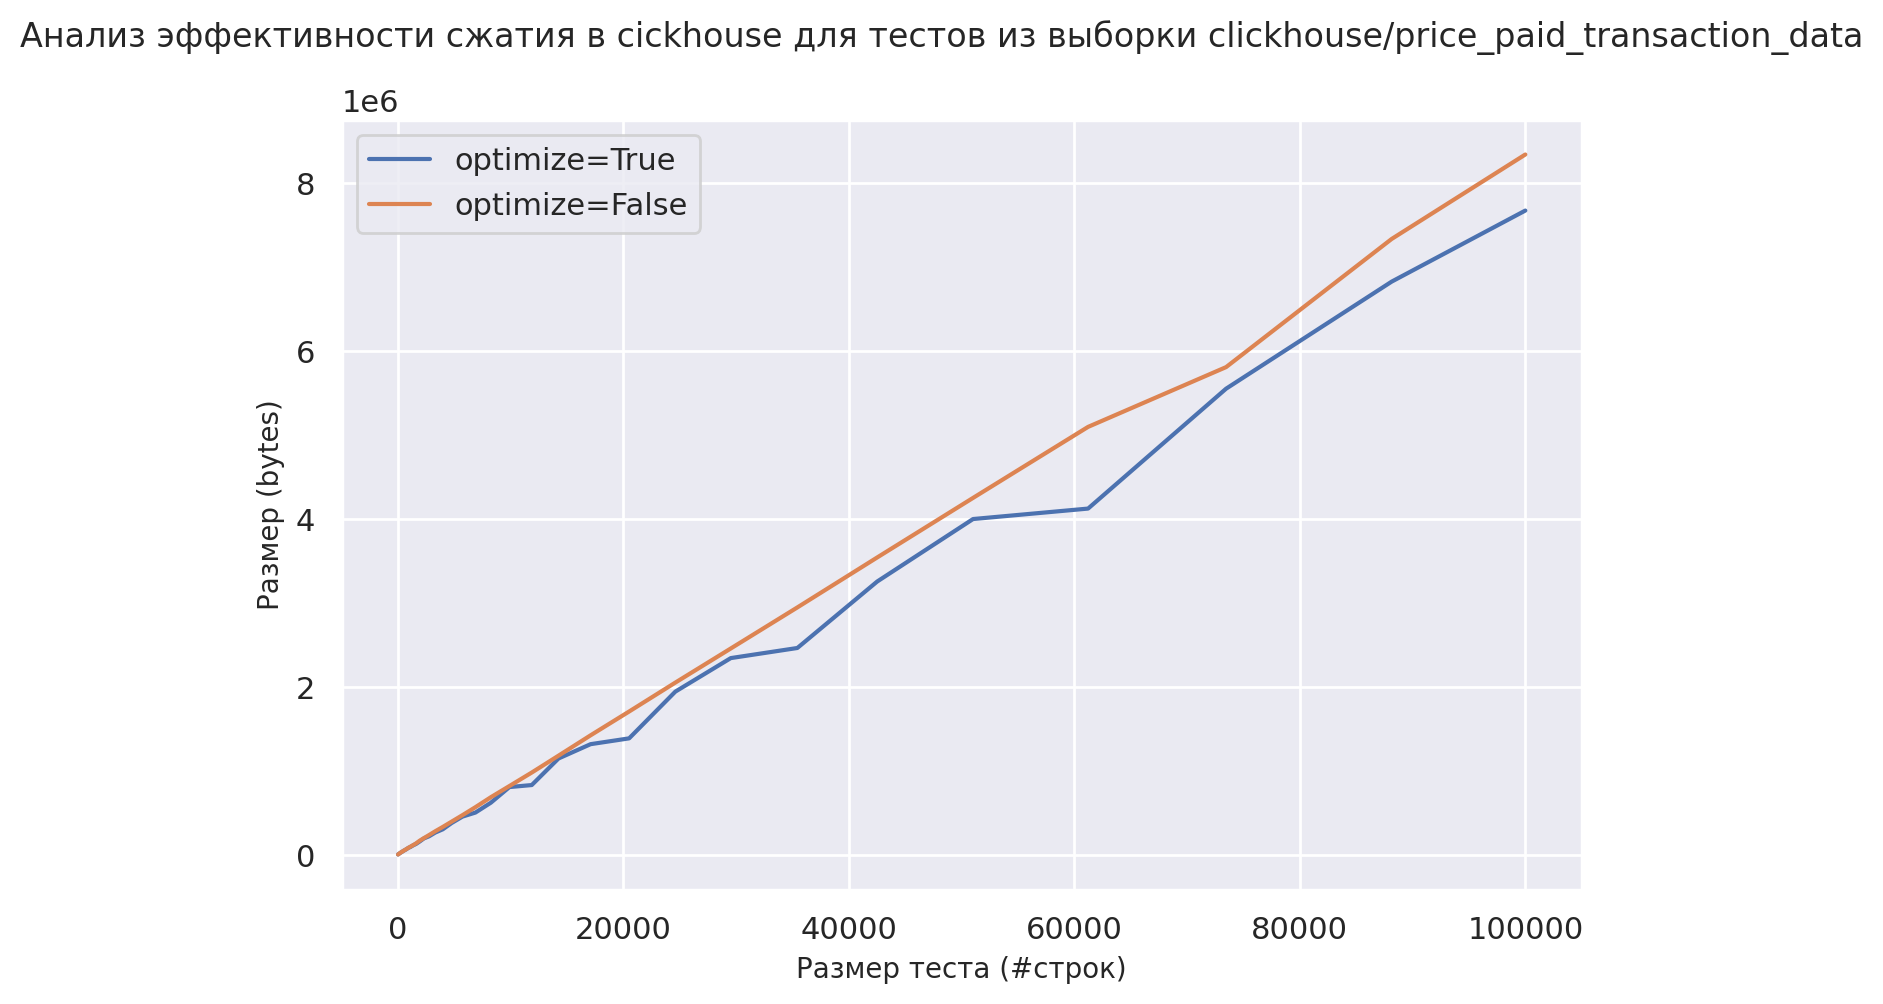

In [11]:
for test_type in tests_types:
    plot_for_test_type_clickhouse(test_type)
